# Machine Learning Project - Ames Housing Data

Ames, Iowa is the college town of **Iowa State University**. The Ames housing dataset consists of about $2500$ house sale records between $2006-2010$. Detailed information about the house attributes, along with the sale prices, is recorded in the dataset. The goal of the project is to:
- perform descriptive data analysis to gain business (i.e. housing market) insights
- build descriptive machine learning models to understand the local housing market.
- build predictive machine learning models for the local house price prediction.

A subset of the **Ames** dataset is hosted on [**Kaggle**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) as an entry-level regression competition. You may visit their site for some information on the meanings of its data columns (the data dictionary). In this notebook, we will describe various project ideas related to this data.

## Import libraries

In [3]:
#!pip install pandas
import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
#import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.stats import skew
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from IPython.display import display
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

import math



In [4]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape


(2580, 81)

## The Data

There are two data sets included in the data folder: `Ames_Housing_Price_Data.csv` and `Ames_Real_Estate_Data.csv`.

The `Ames_Housing_Price_Data.csv` set contains $81$ data columns, including the key feature **SalePrice** which will be used as the target of the predictive/descriptive modeling. **PID** refers to the land parcel ID, which can merged on the *MapRefNo* column of the **Ames Accessor Data** (`Ames_Real_Estate_Data.csv`) to find the property address. Using a free service, such as **geopy**, we can find the long-lat coordinates of the houses.

The columns of the data are mostly attributes associated with the land and the houses. There are size related attributes, quality and condition attributes, house attachment attributes, etc.

To establish a foundation for your team's data analytics, we offer some insights on the house sizes vs. prices.

## Descriptive Stats

In [5]:
housing.describe()

PID    GrLivArea      SalePrice   MSSubClass  LotFrontage  \
count  2.580000e+03  2580.000000    2580.000000  2580.000000  2118.000000   
mean   7.148300e+08  1486.039922  178059.623256    57.691860    68.516053   
std    1.886626e+08   488.650181   75031.089374    42.802105    22.835831   
min    5.263011e+08   334.000000   12789.000000    20.000000    21.000000   
25%    5.313630e+08  1112.000000  129975.000000    20.000000    57.000000   
50%    5.354546e+08  1436.000000  159900.000000    50.000000    68.000000   
75%    9.071811e+08  1733.000000  209625.000000    70.000000    80.000000   
max    1.007100e+09  4676.000000  755000.000000   190.000000   313.000000   

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    2580.000000  2580.000000  2580.000000  2580.000000   2580.000000   
mean    10120.153488     6.046124     5.618605  1970.313953   1983.751938   
std      8126.937892     1.367590     1.122008    29.719705     20.490242   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7406.750000     5.000000     5.000000  1953.000000   1965.000000   
50%      9391.000000     6.000000     5.000000  1972.000000   1992.000000   
75%     11494.000000     7.000000     6.000000  1999.000000   2003.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

       ...   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  ...  2579.000000  2580.000000  2580.000000    2580.000000  2580.000000   
mean   ...   466.842575    95.919767    46.085271      23.214341     2.511240   
std    ...   207.476842   129.052016    66.060664      64.107825    25.293935   
min    ...     0.000000     0.000000     0.000000       0.000000     0.000000   
25%    ...   318.000000     0.000000     0.000000       0.000000     0.000000   
50%    ...   474.000000     0.000000    25.500000       0.000000     0.000000   
75%    ...   576.000000   168.000000    68.000000       0.000000     0.000000   
max    ...  1488.000000  1424.000000   742.000000    1012.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  2580.000000  2580.000000   2580.000000  2580.000000  2580.000000  
mean     16.200388     1.662016     48.731395     6.150775  2007.838372  
std      56.824783    30.339396    498.725058     2.670647     1.312333  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  15500.000000    12.000000  2010.000000  

[8 rows x 38 columns]

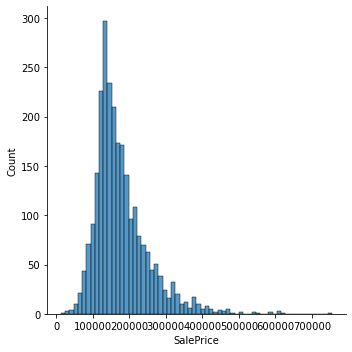

In [6]:
sns.displot(housing["SalePrice"])

In [7]:
housing["SalePrice"].describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

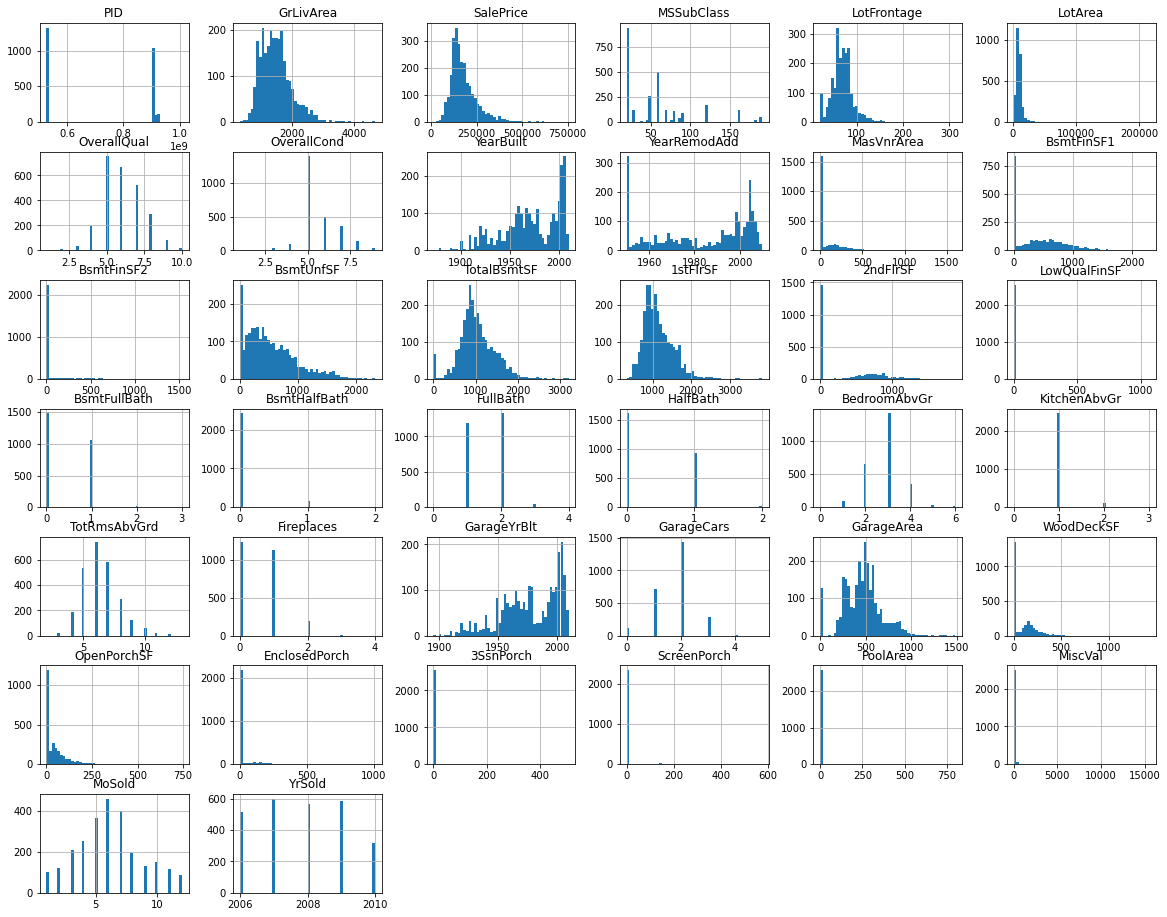

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 16))
plt.show()

## Visualising Geographical Data 

In [9]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

GrLivArea  LotArea  MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1        856     7890         0.0      618.0        856.0       856         0   
2       1049     4235       149.0      104.0       1049.0      1049         0   
3       1001     6060         0.0      100.0        837.0      1001         0   
4       1039     8146         0.0      405.0        405.0       717       322   
5       1665     8400         0.0      167.0        810.0       810       855   

   LowQualFinSF  GarageArea  WoodDeckSF  OpenPorchSF  PoolArea  
1             0       399.0           0            0         0  
2             0       266.0           0          105         0  
3             0       216.0         154            0         0  
4             0       281.0           0            0         0  
5             0       528.0           0           45         0

### Looking for correlation

*Pearson's Correlation*

In [10]:
corr_matrix = housing.corr() #pearson's correlation
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652222
1stFlrSF         0.642613
GarageCars       0.638801
GarageArea       0.634992
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.520763
YearRemodAdd     0.514309
MasVnrArea       0.500964
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.460792
LotFrontage      0.358577
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.291080
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.167519
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022520
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033802
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePr

Text(0.5, 1.0, 'SalePrice Correlation')

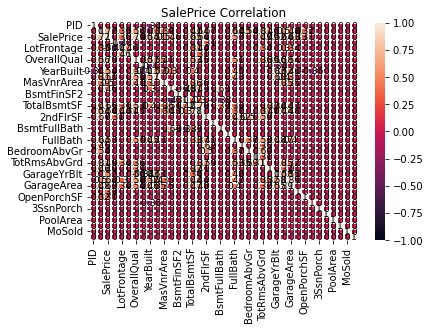

In [11]:
# plot the heatmap
# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"},annot=True)
plt.title("SalePrice Correlation")

Highest correlation with Overall quality, greater living area, total basement area, 1st floor area

*p-values associated with correlation*

In [12]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

*scatter matrix*

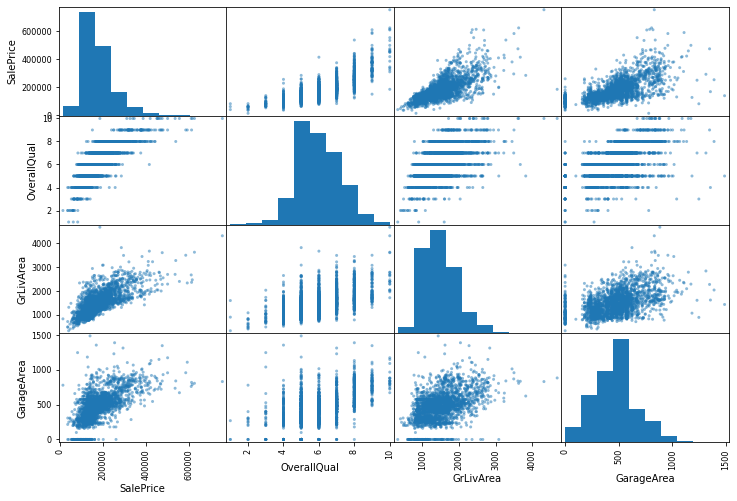

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageArea"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Looking at the scatter plots and correlation, it looks like Ground floor living area are highly correlated 
We look at this more closely 

<AxesSubplot:>

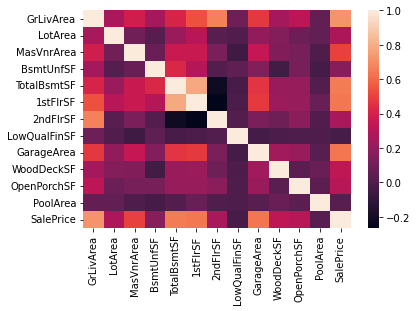

In [14]:
##seaborn
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr)

### GrLivArea 

Most of the size related columns have significant p-values on their correlations with **SalePrice**. The **Gross Living Area** (GrLivArea) has a vanishing p-value, which indicates a very strong statistical relationship. We will focus our research on **GrLivArea**.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

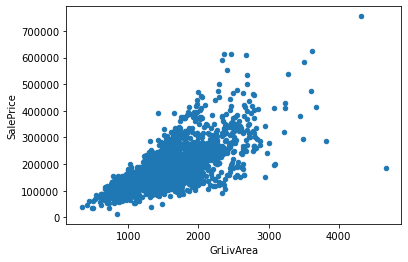

In [15]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

In [16]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699005

In [17]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

0.5400973491971155

ValueError: num must be 1 <= num <= 40, not 41

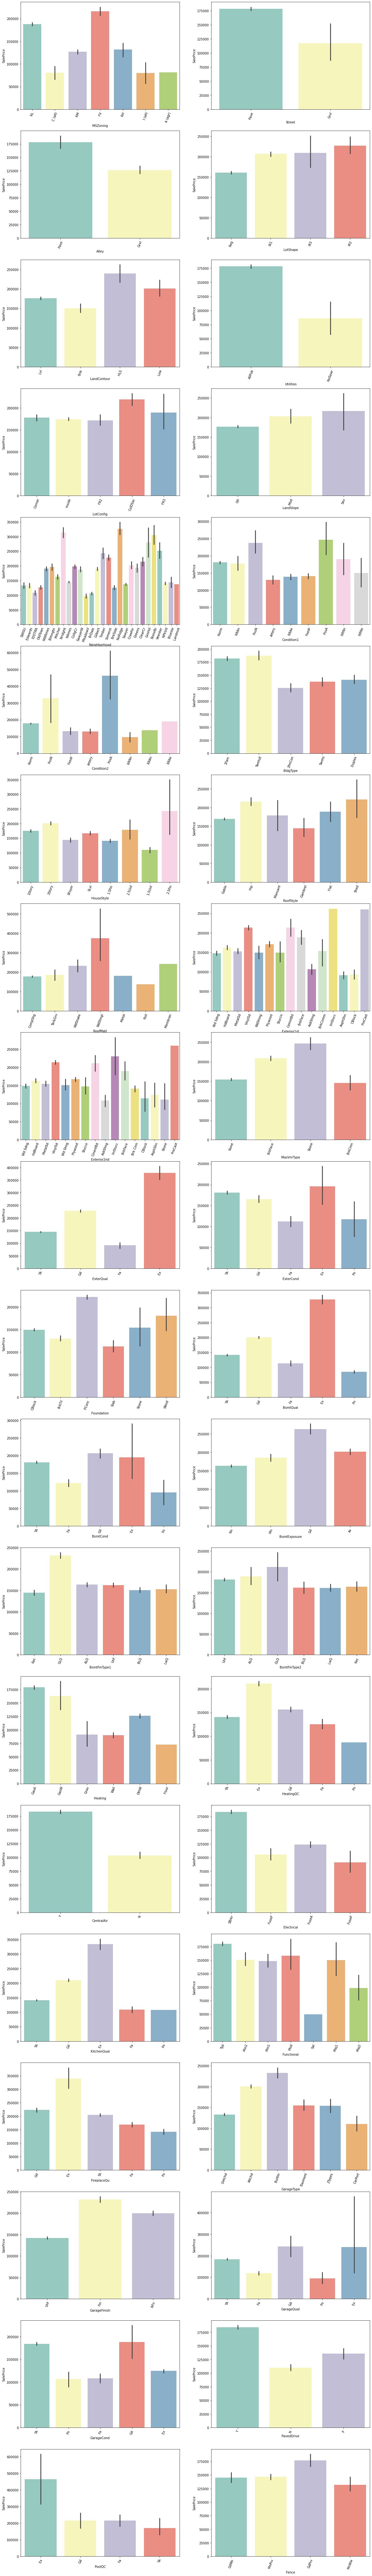

In [18]:
## barplot for saleprice and the data type with objects
## Getting the features with object datatype
dtype_objects = list(columns for columns in housing.select_dtypes([object]).columns)
plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=housing[c],y=housing.SalePrice,palette='Set3')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show() 

## Data Cleaning

### Missing values

#### Graph missing value columns

In [19]:
#!pip install pandas
import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns ## seaborn used for visualization 
#import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.stats import skew
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import display
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor

import math


In [20]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

In [21]:
##look for duplicates 
idsUnique = len(set(housing.PID))
idsTotal = housing.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 1 duplicate IDs for 2580 total entries


In [22]:
#housing.drop("PID", axis = 1, inplace = True)

In [23]:
housing.to_csv('Ames_cleaned_toexamine.csv', index=False)

<Figure size 1440x3600 with 0 Axes>

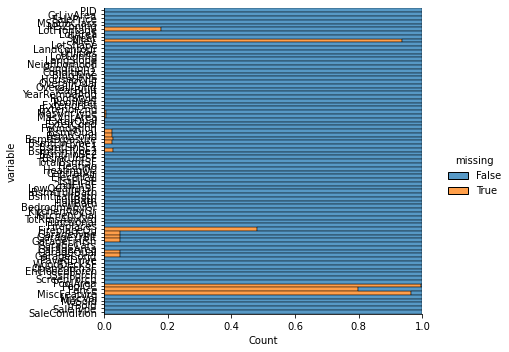

In [24]:
plt.figure(figsize=(20,50))
sns.displot(
    data=housing.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=400)

#### Imputation 

BsmtQual and Garage type 
Impute "None" - as not a missing value as these houses did not have these features 
Impute 0 GarageArea and TotalBmstSF as missing house features 
Impute mode for electrical and utilities

Remove Alley, PoolQC, Fence, MisFeature as >=80% missing values 

In [25]:
housing.shape

(2580, 81)

In [26]:
## Fill missing with 'none'
housing['BsmtQual'] =  housing['BsmtQual'].fillna('No')
housing['GarageType'] =  housing['GarageType'].fillna('No')


##Fill missing with 0
housing['GarageArea'] =  housing['GarageArea'].fillna(0)
housing['TotalBsmtSF'] =  housing['TotalBsmtSF'].fillna(0)

#Impute mode
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])
housing['Utilities'] = housing['Utilities'].fillna(housing['Utilities'].mode()[0])
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])

# # ##Impute median
# housing['LotFrontage'].fillna(housing['LotFrontage'].mean, inplace=True)
# housing['MasVnrArea'].fillna(housing['MasVnrArea'].median, inplace=True)
# housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].median, inplace=True)

##Replace missing values with 'NA' - roughly 2.5% missing in each column
housing['BsmtQual']=housing['BsmtQual'].fillna('No')
housing['BsmtCond']=housing['BsmtCond'].fillna('No')
housing['BsmtExposure']=housing['BsmtExposure'].fillna('No')
housing['BsmtFinType1']=housing['BsmtFinType1'].fillna('No')
housing['BsmtFinType2']=housing['BsmtFinType2'].fillna('No')
housing['GarageType']=housing['GarageType'].fillna('No')
housing['GarageFinish']=housing['GarageFinish'].fillna('No')
housing['GarageQual']=housing['GarageQual'].fillna('No')
housing['GarageCond']=housing['GarageCond'].fillna('No')
housing['FireplaceQu']=housing['FireplaceQu'].fillna('No')

#Replace ordinal catagorical coding - from pandas
housing['LandSlope'].replace(['Gtl','Mod','Sev'], [0,1,2], inplace=True)
housing['BsmtCond'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4,5], inplace=True)
housing['BsmtQual'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4,5], inplace=True)
housing['ExterQual'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4, 5], inplace=True)
housing['ExterCond'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4, 5], inplace=True)
housing['HeatingQC'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4, 5], inplace=True)
housing['KitchenQual'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4, 5], inplace=True)
housing['FireplaceQu'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4, 5], inplace=True)
housing['GarageQual'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4, 5], inplace=True)
housing['GarageCond'].replace(['Ex','Gd','TA', 'Fa', 'Po', 'No'], [0,1,2,3,4, 5], inplace=True)

#housing['BsmtQual'] = housing['BsmtQual'].astype('category')

In [27]:
#housing.to_csv("test.csv")

<Figure size 1440x3600 with 0 Axes>

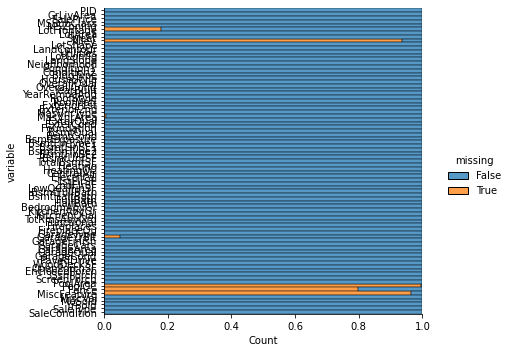

In [28]:
plt.figure(figsize=(20,50))
sns.displot(
    data=housing.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=400)

In [29]:
#remove columns with >80% missing data
housing = housing.drop(columns=['Alley','PoolQC','Fence','MiscFeature', 'PID'])
categorical_features = ['MSZoning', 'MSSubClass', 'Street', 'LotShape','LandContour', 'Utilities',
       'LotConfig',  'Condition1', 'Condition2', 'BldgType', 
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrType', 'Foundation',  'BsmtExposure', 'BsmtFinType1','BedroomAbvGr', 'KitchenAbvGr', 
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'MoSold',
        'Neighborhood',                
       'SaleCondition']
housing[categorical_features] = housing[categorical_features].astype(object)

# catagorical_ordinal_features = ['LandSlope',  'OverallQual', 'OverallCond','BsmtCond', 'BsmtQual', 
#                                 'FireplaceQu', 'KitchenQual', 'ExterQual', 'ExterCond',
#                                'GarageQual', 'GarageCond','HeatingQC']
# housing[catagorical_ordinal_features] = housing[catagorical_ordinal_features].astype('float64')

In [30]:
housing['MoSold']

1       3
2       2
3      11
4       5
5      11
       ..
759     5
760     6
761     8
762     7
763     9
Name: MoSold, Length: 2580, dtype: object

<Figure size 1440x3600 with 0 Axes>

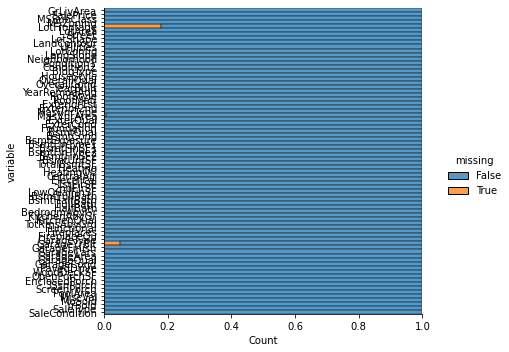

In [31]:
plt.figure(figsize=(20,50))
sns.displot(
    data=housing.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=400)

In [32]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = housing.select_dtypes(include = ["object"]).columns
numerical_features = housing.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 39
Categorical features : 36


In [33]:
catag_columns = housing.select_dtypes(['object']).columns
print(catag_columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')


In [34]:
numer_columns = housing.select_dtypes(include=['float64', 'int64']).columns
print(numer_columns)
print("numerical features : " + str(len(numer_columns)))

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')
numerical features : 40


In [35]:
##train/test split 
from sklearn.model_selection import train_test_split 
X = housing.drop('SalePrice',axis=1)
y = housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.head()

GrLivArea MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
480       1298         50       RL         45.0     8212   Pave      Reg   
605       1694         50       RL         60.0     8400   Pave      Reg   
690       1824         90       RL         76.0    12436   Pave      Reg   
339       1029         20       RL         61.0     7943   Pave      Reg   
711       2268         70       RM         50.0     9000   Pave      Reg   

    LandContour Utilities LotConfig  ...  OpenPorchSF EnclosedPorch 3SsnPorch  \
480         Lvl    AllPub    Inside  ...            0             0         0   
605         Bnk    AllPub    Inside  ...            0           128         0   
690         Lvl    AllPub    Inside  ...            0             0         0   
339         Lvl    AllPub    Inside  ...            0            39         0   
711         Lvl    AllPub    Inside  ...          108             0         0   

    ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
480           0        0       0       9    2009       WD          Normal  
605           0        0       0       6    2008       WD          Normal  
690           0        0       0       1    2008       WD          Normal  
339           0        0       0       4    2007       WD          Normal  
711           0        0       0       4    2010       WD          Normal  

[5 rows x 75 columns]

In [36]:
##export table to examine columns
#housing.to_csv('Ames_cleaned_toexamine.csv', index=True)

In [37]:
#Preprocessor 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
#pre-processing steps for numerical and catagorical features 
#- here you define the transformer and then function you want to apply. 
#- order of transformation is the order you do them in
#- here you deal with missing data, then standardise numeric features and encode catagorical features. 

numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ,('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])
categorical_ordinal_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ,('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=12)) ## 
       ,('scaler', StandardScaler())
])

In [39]:
#Next decide which columns are numeric and which are catagorical 
# apply transforms using column transformers 

numeric_features = ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd',
       'MasVnrArea',  'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 
       'TotRmsAbvGrd', 'Fireplaces',  'GarageYrBlt',
       'GarageCars', 'GarageArea',  'WoodDeckSF',
       'OpenPorchSF',  'PoolArea',
       'MiscVal', 'YrSold']
categorical_features = ['MSZoning', 'MSSubClass', 'Street', 'LotShape','LandContour', 'Utilities',
       'LotConfig', 'Condition1', 'Condition2', 'BldgType', 
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrType', 'Foundation',  'BsmtExposure', 'BsmtFinType1','BedroomAbvGr', 'KitchenAbvGr', 
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'MoSold',
        'Neighborhood',
       'SaleCondition']


catagorical_ordinal_features = ['LandSlope',  'OverallQual', 'OverallCond','BsmtCond', 'BsmtQual', 
                                'FireplaceQu', 'KitchenQual', 'ExterQual', 'ExterCond',
                               'GarageQual', 'GarageCond','HeatingQC']


preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
       ,('catagorical_ordinal', categorical_ordinal_transformer, catagorical_ordinal_features)
   ],
    remainder="passthrough")

#('scaler', StandardScaler()

# you can do this by d-types but some catagorical columns disguised as numerical so only do this if 100% sure of dtypes
# not recommended
#numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = data.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns

In [40]:
#Use methods to evaluate the model 

# predictions = rf_model.predict(X_test)
# print (r2_score(y_test, predictions))

#### Set up K fold cross validation

In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=42, shuffle=True) 

##### Define error metrics - RMSE

In [42]:
from sklearn.model_selection import cross_val_score


def cv_rmse(model, X, Y):
    rmse = -cross_val_score(model, X, Y, scoring = 'neg_root_mean_squared_error', cv = kf)
    return [rmse.mean(), rmse.std()]

RMSE = {}

##### Multiple linear regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipeline = Pipeline(steps = [
                ('preprocessor', preprocessor),
              ('regressor',LinearRegression())
           ])

#rmse = -cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
#print(rmse.mean())
#print(rmse.std())

#MLR = LinearRegression()

RMSE['MLR'] = cv_rmse(pipeline, X_train, y_train)


In [44]:
RMSE

{'MLR': [26163.026652892215, 5087.171446335138]}

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])
rf_model = pipeline.fit(X_train, y_train)

#Use methods to evaluate the model - root mean squared error
predictions = rf_model.predict(X_test)
print (mean_squared_error(y_test, predictions, squared=False)) #need to square root this but np.sqrt not working



35967.090954505074


#### Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LogisticRegression())
           ])
RMSE['LogR'] = cv_rmse(pipeline, X_train, y_train) #takes a couple of minutes


In [47]:
RMSE

{'MLR': [26163.026652892215, 5087.171446335138],
 'LogR': [43410.83740533177, 6420.900198087406]}

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LogisticRegression())
           ])
rf_model = pipeline.fit(X_train, y_train)
#Use methods to evaluate the model - root mean squared error
predictions = rf_model.predict(X_test)
print (mean_squared_error(y_test, predictions, squared=False)) #need to square root this but np.sqrt not working

40417.67978237136


#### Lasso, Ridge, Elastic Net 

In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

##### Lasso

In [50]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('model',Lasso())
           ])
alphas = [{"model__alpha": np.logspace(-4, 2, num=20)}]

Lasso_GS = GridSearchCV(pipeline, alphas, scoring = 'neg_root_mean_squared_error', cv = kf)

Lasso_GS.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['GrLivArea',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                          

In [51]:
Lasso_best_params = Lasso_GS.best_params_
RMSE['Lasso'] = [-Lasso_GS.best_score_, Lasso_GS.cv_results_['std_test_score'][Lasso_GS.best_index_]]

In [52]:
Lasso_GS.best_params_
#48.32930238571752 model_alpha

{'model__alpha': 48.32930238571752}

In [53]:
#Use methods to evaluate the model - root mean squared error
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('model',Lasso(alpha=48.32930238571752))
           ])

rf_model = pipeline.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
print (mean_squared_error(y_test, predictions, squared=False)) 

29690.16347748866


In [54]:
RMSE

{'MLR': [26163.026652892215, 5087.171446335138],
 'LogR': [43410.83740533177, 6420.900198087406],
 'Lasso': [23660.196536148418, 4531.639434472478]}

##### Ridge

In [55]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('model',Ridge())
           ])
alphas = [{"model__alpha": np.logspace(-4, 2, num=20)}]

Ridge_GS = GridSearchCV(pipeline, alphas, scoring = 'neg_root_mean_squared_error', cv = kf)
Ridge_GS.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['GrLivArea',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                          

In [56]:
Ridge_best_params = Ridge_GS.best_params_
RMSE['Ridge'] = [-Ridge_GS.best_score_, Ridge_GS.cv_results_['std_test_score'][Ridge_GS.best_index_]]

In [70]:
Ridge_GS.best_params_

{'model__alpha': 11.288378916846883}

In [57]:
RMSE

{'MLR': [26163.026652892215, 5087.171446335138],
 'LogR': [43410.83740533177, 6420.900198087406],
 'Lasso': [23660.196536148418, 4531.639434472478],
 'Ridge': [24071.457979570798, 4878.902157258771]}

##### Elastic Net

In [58]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('model',ElasticNet())
           ])
alphas = [{"model__alpha": np.logspace(-4, 2, num=20)}]

ElasticNet_GS = GridSearchCV(pipeline, alphas, scoring = 'neg_root_mean_squared_error', cv = kf)
ElasticNet_GS.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['GrLivArea',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                          

In [59]:
ElasticNet_best_params = ElasticNet_GS.best_params_
RMSE['ElasticNet'] = [-ElasticNet_GS.best_score_, ElasticNet_GS.cv_results_['std_test_score'][ElasticNet_GS.best_index_]]

In [71]:
ElasticNet_GS.best_params_

{'model__alpha': 0.007847599703514606}

In [60]:
RMSE

{'MLR': [26163.026652892215, 5087.171446335138],
 'LogR': [43410.83740533177, 6420.900198087406],
 'Lasso': [23660.196536148418, 4531.639434472478],
 'Ridge': [24071.457979570798, 4878.902157258771],
 'ElasticNet': [24060.04858230607, 4883.4597800860465]}

#### Tree Based Models 

##### Random Forest 

In [61]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

In [62]:
#from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('clf',RandomForestRegressor(oob_score=True, random_state=42))
           ])


# Declare a hyperparameter grid
param_grid = {
    "clf__n_estimators": [100, 500],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__max_features": [0.1, 1.1, 0.3],#[*np.arange(0.1, 1.1, 0.1)],
}

# grid_para_forest = [{
#     "n_estimators": np.linspace(100, 2000, 5, dtype = int),
# #     "max_depth": 'None',
#     "min_samples_leaf": np.linspace(start=1, stop=10, num=4, dtype=int),
#     "min_samples_split": np.linspace(start=2, stop=20, num=4, dtype=int)
# #     "max_features": 'auto'
# }]

grid_search_forest = GridSearchCV(pipeline, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
grid_search_forest.fit(X_train, y_train)



Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 1/10; 1/24] END clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100;, score=-55613.640 total time=   0.0s
[CV 2/10; 1/24] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 2/10; 1/24] END clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100;, score=-45482.580 total time=   0.1s
[CV 3/10; 1/24] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 3/10; 1/24] END clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100;, score=-48998.650 total time=   0.0s
[CV 4/10; 1/24] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 4/10; 1/24] END clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100;, score=-46221.400 total time=   0.0s
[CV 5/10; 1/24] START clf__max_depth=1, clf__max_features=0.1, clf__n_estimators=100
[CV 5/10; 1/24] END clf__max

[CV 2/10; 5/24] START clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100
[CV 2/10; 5/24] END clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100;, score=-43510.908 total time=   0.1s
[CV 3/10; 5/24] START clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100
[CV 3/10; 5/24] END clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100;, score=-43818.175 total time=   0.1s
[CV 4/10; 5/24] START clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100
[CV 4/10; 5/24] END clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100;, score=-43355.018 total time=   0.1s
[CV 5/10; 5/24] START clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100
[CV 5/10; 5/24] END clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100;, score=-57243.835 total time=   0.1s
[CV 6/10; 5/24] START clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100
[CV 6/10; 5/24] END clf__max_depth=1, clf__max_features=0.3, clf__n_estimators=100;, score=

[CV 4/10; 9/24] END clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 9/24] START clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100
[CV 5/10; 9/24] END clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 9/24] START clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100
[CV 6/10; 9/24] END clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 9/24] START clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100
[CV 7/10; 9/24] END clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 9/24] START clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100
[CV 8/10; 9/24] END clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 9/24] START clf__max_depth=5, clf__max_features=1.1, clf__n_estimators=100
[CV 9

[CV 4/10; 13/24] END clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100;, score=-20616.395 total time=   0.8s
[CV 5/10; 13/24] START clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100
[CV 5/10; 13/24] END clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100;, score=-30062.426 total time=   0.7s
[CV 6/10; 13/24] START clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100
[CV 6/10; 13/24] END clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100;, score=-25578.699 total time=   0.7s
[CV 7/10; 13/24] START clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100
[CV 7/10; 13/24] END clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100;, score=-26223.198 total time=   0.8s
[CV 8/10; 13/24] START clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100
[CV 8/10; 13/24] END clf__max_depth=10, clf__max_features=0.1, clf__n_estimators=100;, score=-28657.162 total time=   0.7s
[CV 9/10; 13/24] START clf__max_depth

[CV 4/10; 17/24] END clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100;, score=-19671.779 total time=   1.9s
[CV 5/10; 17/24] START clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100
[CV 5/10; 17/24] END clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100;, score=-28407.688 total time=   1.9s
[CV 6/10; 17/24] START clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100
[CV 6/10; 17/24] END clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100;, score=-24627.314 total time=   1.9s
[CV 7/10; 17/24] START clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100
[CV 7/10; 17/24] END clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100;, score=-25069.092 total time=   1.9s
[CV 8/10; 17/24] START clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100
[CV 8/10; 17/24] END clf__max_depth=10, clf__max_features=0.3, clf__n_estimators=100;, score=-27922.460 total time=   1.9s
[CV 9/10; 17/24] START clf__max_depth

[CV 5/10; 21/24] START clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100
[CV 5/10; 21/24] END clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 21/24] START clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100
[CV 6/10; 21/24] END clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 21/24] START clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100
[CV 7/10; 21/24] END clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 21/24] START clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100
[CV 8/10; 21/24] END clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 21/24] START clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100
[CV 9/10; 21/24] END clf__max_depth=25, clf__max_features=1.1, clf__n_estimators=100;, score=nan tota

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['GrLivArea',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                          

In [63]:
#print(grid_search_forest.score())
print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)
print(grid_search_forest.cv_results_['std_test_score'][grid_search_forest.best_index_])

{'clf__max_depth': 25, 'clf__max_features': 0.3, 'clf__n_estimators': 500}
-24616.403844486653
4003.205398821964


In [64]:
# max depth 25, max featues 0.3, nestimators 500
RMSE['Random Forest'] = [24616.403844486653, 4003.205398821964]

In [65]:
RMSE

{'MLR': [26163.026652892215, 5087.171446335138],
 'LogR': [43410.83740533177, 6420.900198087406],
 'Lasso': [23660.196536148418, 4531.639434472478],
 'Ridge': [24071.457979570798, 4878.902157258771],
 'ElasticNet': [24060.04858230607, 4883.4597800860465],
 'Random Forest': [24616.403844486653, 4003.205398821964]}

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])
rf_model = pipeline.fit(X_train, y_train)

#Use methods to evaluate the model - root mean squared error
predictions = rf_model.predict(X_test)
print (mean_squared_error(y_test, predictions, squared=False)) #need to square root this but np.sqrt not working

20767.42880248483


##### Gradient Boosting

In [67]:
# Hyperparameters for GradientBoostingRegressor
#
# gbr_params = {'n_estimators': 1000,
#           'max_depth': 3,
#           'min_samples_split': 5,
#           'learning_rate': 0.01,
#           'loss': 'ls'}

In [74]:
GBM = ensemble.GradientBoostingRegressor(random_state=42)

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('model',GradientBoostingRegressor(random_state=42))
           ])

# Declare a hyperparameter grid
# param_grid = {
#     "max_depth": np.linspace(1, 5, 3, dtype = int)#,
#     #"clf__max_depth": [1, 5, 10, 25],
#     #"clf__max_features": [0.1, 1.1, 0.3],#[*np.arange(0.1, 1.1, 0.1)],
# }

grid_para_GBM = [{
    'max_depth': np.linspace(1, 5, 3, dtype = int),
#     'max_leaf_nodes': 'None',
    #'min_samples_leaf': np.linspace(start=1, stop=2, num=2, dtype=int),
    'min_samples_split': np.linspace(start=2, stop=4, num=2, dtype=int),
#     'min_impurity_decrease': 0,
#     'criterion': 'friedman_mse',
    'n_estimators': np.linspace(100, 2000, 5, dtype = int),
    'learning_rate': np.logspace(-2,1,4)
#     'subsamples': 1,
#     'max_features': 'None'
}]

grid_search_GBM_1 = GridSearchCV(GBM, grid_para_GBM, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)

In [75]:
grid_search_GBM_1.fit(X_train, y_train)
# le = preprocessing.LabelEncoder()
# X = le.fit_transform(X)
#grid_search_GBM_2.fit(transformed_train_nooutlier_df_2, train_noOL_y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV 1/10; 1/120] START learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100
[CV 1/10; 1/120] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10; 1/120] START learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100
[CV 2/10; 1/120] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 1/120] START learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100
[CV 3/10; 1/120] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 1/120] START learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100
[CV 4/10; 1/120] END learning_rate=0.01, max_depth=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 1/120] START learning_rate=0.01, max_depth=1, min_samples

[CV 5/10; 6/120] END learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 6/120] START learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100
[CV 6/10; 6/120] END learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 6/120] START learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100
[CV 7/10; 6/120] END learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 6/120] START learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100
[CV 8/10; 6/120] END learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 6/120] START learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100
[CV 9/10; 6/120] END learning_rate=0.01, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10

[CV 1/10; 12/120] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 2/10; 12/120] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575
[CV 2/10; 12/120] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 3/10; 12/120] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575
[CV 3/10; 12/120] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 4/10; 12/120] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575
[CV 4/10; 12/120] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 5/10; 12/120] START learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575
[CV 5/10; 12/120] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s


[CV 1/10; 18/120] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 2/10; 18/120] START learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050
[CV 2/10; 18/120] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 3/10; 18/120] START learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050
[CV 3/10; 18/120] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 4/10; 18/120] START learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050
[CV 4/10; 18/120] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 5/10; 18/120] START learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050
[CV 5/10; 18/120] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=1050;, score=nan total time

[CV 9/10; 23/120] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 10/10; 23/120] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1050
[CV 10/10; 23/120] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 1/10; 24/120] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1525
[CV 1/10; 24/120] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1525;, score=nan total time=   0.0s
[CV 2/10; 24/120] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1525
[CV 2/10; 24/120] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1525;, score=nan total time=   0.0s
[CV 3/10; 24/120] START learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1525
[CV 3/10; 24/120] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1525;, score=nan total ti

[CV 4/10; 29/120] END learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 5/10; 29/120] START learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525
[CV 5/10; 29/120] END learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 6/10; 29/120] START learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525
[CV 6/10; 29/120] END learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 7/10; 29/120] START learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525
[CV 7/10; 29/120] END learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 8/10; 29/120] START learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525
[CV 8/10; 29/120] END learning_rate=0.01, max_depth=5, min_samples_split=4, n_estimators=1525;, score=nan total time

[CV 10/10; 34/120] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=1525;, score=nan total time=   0.0s
[CV 1/10; 35/120] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000
[CV 1/10; 35/120] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 2/10; 35/120] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000
[CV 2/10; 35/120] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 3/10; 35/120] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000
[CV 3/10; 35/120] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 4/10; 35/120] START learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000
[CV 4/10; 35/120] END learning_rate=0.1, max_depth=1, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s

[CV 6/10; 40/120] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 7/10; 40/120] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000
[CV 7/10; 40/120] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 8/10; 40/120] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000
[CV 8/10; 40/120] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 9/10; 40/120] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000
[CV 9/10; 40/120] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 10/10; 40/120] START learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000
[CV 10/10; 40/120] END learning_rate=0.1, max_depth=1, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0

[CV 2/10; 46/120] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 46/120] START learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100
[CV 3/10; 46/120] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 46/120] START learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100
[CV 4/10; 46/120] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 46/120] START learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100
[CV 5/10; 46/120] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 46/120] START learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100
[CV 6/10; 46/120] END learning_rate=0.1, max_depth=3, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10;

[CV 6/10; 51/120] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 51/120] START learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100
[CV 7/10; 51/120] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 51/120] START learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100
[CV 8/10; 51/120] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 9/10; 51/120] START learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100
[CV 9/10; 51/120] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 10/10; 51/120] START learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100
[CV 10/10; 51/120] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/1

[CV 1/10; 57/120] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 2/10; 57/120] START learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575
[CV 2/10; 57/120] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 3/10; 57/120] START learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575
[CV 3/10; 57/120] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 4/10; 57/120] START learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575
[CV 4/10; 57/120] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 5/10; 57/120] START learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575
[CV 5/10; 57/120] END learning_rate=0.1, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 6/10;

[CV 1/10; 63/120] END learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 2/10; 63/120] START learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050
[CV 2/10; 63/120] END learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 3/10; 63/120] START learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050
[CV 3/10; 63/120] END learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 4/10; 63/120] START learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050
[CV 4/10; 63/120] END learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 5/10; 63/120] START learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050
[CV 5/10; 63/120] END learning_rate=1.0, max_depth=1, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s


[CV 2/10; 68/120] END learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 3/10; 68/120] START learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050
[CV 3/10; 68/120] END learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 4/10; 68/120] START learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050
[CV 4/10; 68/120] END learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 5/10; 68/120] START learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050
[CV 5/10; 68/120] END learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 6/10; 68/120] START learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050
[CV 6/10; 68/120] END learning_rate=1.0, max_depth=1, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s


[CV 6/10; 73/120] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 7/10; 73/120] START learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050
[CV 7/10; 73/120] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 8/10; 73/120] START learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050
[CV 8/10; 73/120] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 9/10; 73/120] START learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050
[CV 9/10; 73/120] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0s
[CV 10/10; 73/120] START learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050
[CV 10/10; 73/120] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1050;, score=nan total time=   0.0

[CV 1/10; 79/120] END learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 2/10; 79/120] START learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525
[CV 2/10; 79/120] END learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 3/10; 79/120] START learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525
[CV 3/10; 79/120] END learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 4/10; 79/120] START learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525
[CV 4/10; 79/120] END learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s
[CV 5/10; 79/120] START learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525
[CV 5/10; 79/120] END learning_rate=1.0, max_depth=3, min_samples_split=4, n_estimators=1525;, score=nan total time=   0.0s


[CV 10/10; 84/120] END learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=1525;, score=nan total time=   0.0s
[CV 1/10; 85/120] START learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000
[CV 1/10; 85/120] END learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 2/10; 85/120] START learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000
[CV 2/10; 85/120] END learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 3/10; 85/120] START learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000
[CV 3/10; 85/120] END learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 4/10; 85/120] START learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000
[CV 4/10; 85/120] END learning_rate=1.0, max_depth=5, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s

[CV 7/10; 90/120] END learning_rate=1.0, max_depth=5, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 8/10; 90/120] START learning_rate=1.0, max_depth=5, min_samples_split=4, n_estimators=2000
[CV 8/10; 90/120] END learning_rate=1.0, max_depth=5, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 9/10; 90/120] START learning_rate=1.0, max_depth=5, min_samples_split=4, n_estimators=2000
[CV 9/10; 90/120] END learning_rate=1.0, max_depth=5, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 10/10; 90/120] START learning_rate=1.0, max_depth=5, min_samples_split=4, n_estimators=2000
[CV 10/10; 90/120] END learning_rate=1.0, max_depth=5, min_samples_split=4, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/10; 91/120] START learning_rate=10.0, max_depth=1, min_samples_split=2, n_estimators=100
[CV 1/10; 91/120] END learning_rate=10.0, max_depth=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0

[CV 10/10; 95/120] END learning_rate=10.0, max_depth=1, min_samples_split=2, n_estimators=2000;, score=nan total time=   0.0s
[CV 1/10; 96/120] START learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100
[CV 1/10; 96/120] END learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/10; 96/120] START learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100
[CV 2/10; 96/120] END learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/10; 96/120] START learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100
[CV 3/10; 96/120] END learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/10; 96/120] START learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100
[CV 4/10; 96/120] END learning_rate=10.0, max_depth=1, min_samples_split=4, n_estimators=100;, score=nan total time=   0.0

[CV 4/10; 101/120] END learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/10; 101/120] START learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100
[CV 5/10; 101/120] END learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 6/10; 101/120] START learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100
[CV 6/10; 101/120] END learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 7/10; 101/120] START learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100
[CV 7/10; 101/120] END learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 8/10; 101/120] START learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100
[CV 8/10; 101/120] END learning_rate=10.0, max_depth=3, min_samples_split=2, n_estimators=100;, score=nan total time

[CV 2/10; 107/120] END learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 3/10; 107/120] START learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575
[CV 3/10; 107/120] END learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 4/10; 107/120] START learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575
[CV 4/10; 107/120] END learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 5/10; 107/120] START learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575
[CV 5/10; 107/120] END learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 6/10; 107/120] START learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575
[CV 6/10; 107/120] END learning_rate=10.0, max_depth=3, min_samples_split=4, n_estimators=575;, score=nan total time

[CV 4/10; 112/120] END learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 5/10; 112/120] START learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575
[CV 5/10; 112/120] END learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 6/10; 112/120] START learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575
[CV 6/10; 112/120] END learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 7/10; 112/120] START learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575
[CV 7/10; 112/120] END learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575;, score=nan total time=   0.0s
[CV 8/10; 112/120] START learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575
[CV 8/10; 112/120] END learning_rate=10.0, max_depth=5, min_samples_split=2, n_estimators=575;, score=nan total time

[CV 8/10; 117/120] END learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 9/10; 117/120] START learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=575
[CV 9/10; 117/120] END learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 10/10; 117/120] START learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=575
[CV 10/10; 117/120] END learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=575;, score=nan total time=   0.0s
[CV 1/10; 118/120] START learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=1050
[CV 1/10; 118/120] END learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=1050;, score=nan total time=   0.0s
[CV 2/10; 118/120] START learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=1050
[CV 2/10; 118/120] END learning_rate=10.0, max_depth=5, min_samples_split=4, n_estimators=1050;, score=nan tota

ValueError: could not convert string to float: 'RL'

In [ ]:
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('clf',RandomForestRegressor(oob_score=True, random_state=42))
           ])


# Declare a hyperparameter grid
param_grid = {
    "clf__n_estimators": [100, 500],
    "clf__max_depth": [1, 5, 10, 25],
    "clf__max_features": [0.1, 1.1, 0.3],#[*np.arange(0.1, 1.1, 0.1)],
}

# grid_para_forest = [{
#     "n_estimators": np.linspace(100, 2000, 5, dtype = int),
# #     "max_depth": 'None',
#     "min_samples_leaf": np.linspace(start=1, stop=10, num=4, dtype=int),
#     "min_samples_split": np.linspace(start=2, stop=20, num=4, dtype=int)
# #     "max_features": 'auto'
# }]

grid_search_forest = GridSearchCV(pipeline, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
grid_search_forest.fit(X_train, y_train)

##### SVM 

In [89]:
from sklearn.svm import SVR
pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR())])

grid_para_SVR = [{
    'svr__gamma': np.append(np.logspace(-4, 1, 10), 'scale'),
    'svr__C': np.linspace(1, 100, 10, dtype = int),
    'svr__epsilon': np.logspace(-4, 1, 10)
###     'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] ???
}]



In [91]:
grid_search_SVR = GridSearchCV(pipe, grid_para_SVR, scoring='neg_root_mean_squared_error', cv=kf, verbose = 10)
grid_search_SVR.fit(X_train, y_train)

Fitting 10 folds for each of 1100 candidates, totalling 11000 fits
[CV 1/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 1/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 2/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 3/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 4/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 1/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001........
[CV 5/10; 1/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 1/1100] 

[CV 9/10; 5/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 9/10; 5/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 5/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 10/10; 5/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 1/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 2/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 6/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 3/10; 6/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total ti

[CV 7/10; 10/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 10/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0.........
[CV 8/10; 10/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 10/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0.........
[CV 9/10; 10/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 10/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0........
[CV 10/10; 10/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 11/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=scale........
[CV 1/10; 11/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 11/1100] START svr__C=1, svr__epsilon=0.0001, svr__gamma=scale........
[CV 2/10; 11/1100] END svr__C=1, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total

[CV 4/10; 15/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 5/10; 15/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 6/10; 15/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 7/10; 15/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 15/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 8/10; 15/1100] END svr__C=1, svr__epsilon=0.0003

[CV 5/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 20/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 20/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 7/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 20/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 8/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 20/1100] START svr__C=1, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 9/10; 20/1100] END svr__C=1, svr__epsilon=0.00035938136638046257, svr__g

[CV 4/10; 25/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 25/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 5/10; 25/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 25/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 6/10; 25/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 25/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 7/10; 25/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 8/10; 25/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 8/10; 25/1100] END svr__C=1, svr__epsilon=0.001291549665014884, 

[CV 2/10; 30/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 30/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 3/10; 30/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 30/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 4/10; 30/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 30/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 5/10; 30/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 30/1100] START svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 6/10; 30/1100] END svr__C=1, svr__epsilon=0.001291549665014884, svr__gamma=0.774

[CV 9/10; 34/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 34/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.0001
[CV 10/10; 34/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 35/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 1/10; 35/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 35/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 2/10; 35/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 35/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 3/10; 35/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046

[CV 10/10; 39/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 40/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 1/10; 40/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 40/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 2/10; 40/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 40/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 3/10; 40/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 40/1100] START svr__C=1, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 4/10; 40/1100] END svr__C=1, svr__epsilon=0.004641588833612782, svr__ga

[CV 2/10; 45/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 45/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001
[CV 3/10; 45/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 45/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001
[CV 4/10; 45/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 45/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001
[CV 5/10; 45/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 45/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001
[CV 6/10; 45/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 45/1100] START svr__C=1, svr__epsilon=0.0166810053720

[CV 7/10; 50/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 50/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.05994842503189409
[CV 8/10; 50/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 50/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.05994842503189409
[CV 9/10; 50/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 50/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.05994842503189409
[CV 10/10; 50/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 51/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 1/10; 51/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__g

[CV 6/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 7/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 8/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 9/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 55/1100] START svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 10/10; 55/1100] END svr__C=1, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 56/1100] START svr__C=1, svr__epsilon=0.05994842503189409, s

[CV 2/10; 61/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 61/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 3/10; 61/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 61/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 4/10; 61/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 61/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 5/10; 61/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 61/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 6/10; 61/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=0.0599

[CV 8/10; 66/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 66/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=scale
[CV 9/10; 66/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 66/1100] START svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=scale
[CV 10/10; 66/1100] END svr__C=1, svr__epsilon=0.05994842503189409, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 67/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 1/10; 67/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 67/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 2/10; 67/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 67/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__g

[CV 4/10; 72/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 72/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 5/10; 72/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 72/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 6/10; 72/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 72/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 7/10; 72/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 72/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 8/10; 72/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=0.0599

[CV 5/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 6/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 7/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 8/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 9/10; 77/1100] END svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 77/1100] START svr__C=1, svr__epsilon=0.21544346900318845, svr__gamma=

[CV 5/10; 82/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 82/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 6/10; 82/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 82/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 7/10; 82/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 82/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 8/10; 82/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 82/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 9/10; 82/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=0.01668

[CV 1/10; 88/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 88/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 2/10; 88/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 88/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 3/10; 88/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 88/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 4/10; 88/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 88/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 5/10; 88/1100] END svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 88/1100] START svr__C=1, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 6

[CV 7/10; 93/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 93/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 8/10; 93/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 93/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 9/10; 93/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 93/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 10/10; 93/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 94/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 1/10; 94/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=0.0599484250318

[CV 9/10; 98/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 98/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 10/10; 98/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 99/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 1/10; 99/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 99/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 2/10; 99/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 99/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 3/10; 99/1100] END svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 99/1100] START svr__C=1, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 4/10; 99/110

[CV 10/10; 103/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 1/10; 104/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 2/10; 104/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 3/10; 104/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 4/10; 104/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 104/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=0.016

[CV 9/10; 108/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 108/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=2.782559402207126
[CV 10/10; 108/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 109/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=10.0..........
[CV 1/10; 109/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 109/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=10.0..........
[CV 2/10; 109/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 109/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=10.0..........
[CV 3/10; 109/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 109/1100] START svr__C=1, svr__epsilon=10.0, svr__gamma=10.0..........
[CV 4/10; 109/1100] END svr__C=1, svr__epsilon=10.0, svr__gamma=

[CV 1/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 1/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 2/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 3/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 4/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 114/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 5/10; 114/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=0.00464

[CV 3/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 4/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 5/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 6/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 7/10; 119/1100] END svr__C=12, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 119/1100] START svr__C=12, svr__epsilon=0.0001, svr__gamma=2.7

[CV 3/10; 124/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 124/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 4/10; 124/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 124/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 5/10; 124/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 124/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 6/10; 124/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 124/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 7/10; 124/1100] END svr__C=12, s

[CV 5/10; 129/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 129/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 6/10; 129/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 129/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 7/10; 129/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 129/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 8/10; 129/1100] END svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 129/1100] START svr__C=12, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 9/10; 129/1100] END svr__C=12, svr__epsilon=0.00

[CV 4/10; 134/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 5/10; 134/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 5/10; 134/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 6/10; 134/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 6/10; 134/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 134/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 7/10; 134/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 134/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 134/1100] END svr__C=12, s

[CV 7/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 139/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 139/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 139/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 10/10; 139/1100] END svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 140/1100] START svr__C=12, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 1/10; 140/1100] END svr__C=12, svr__epsilon=0.001291549

[CV 10/10; 144/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 145/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 1/10; 145/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 145/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 2/10; 145/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 145/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 3/10; 145/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 145/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 4/10; 145/1100] END svr__C=12, svr__epsilon=0.0

[CV 4/10; 150/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 150/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 5/10; 150/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 150/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 6/10; 150/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 150/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 7/10; 150/1100] END svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 150/1100] START svr__C=12, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 8/10; 150/1100] END svr__C=12, svr__epsilon=0.0046415888

[CV 1/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 2/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 3/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 4/10; 156/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 5/10; 156/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 5/10; 156/1100] END svr__C=12, s

[CV 6/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 161/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 7/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 161/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 161/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 161/1100] END svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 161/1100] START svr__C=12, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 10/10; 161/1100] END svr__C=12, svr__epsilon=0.01668100

[CV 8/10; 166/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 166/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 9/10; 166/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 166/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 10/10; 166/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 167/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 1/10; 167/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 167/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 2/10; 167/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total t

[CV 3/10; 172/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 172/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 4/10; 172/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 172/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 5/10; 172/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 172/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 6/10; 172/1100] END svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 172/1100] START svr__C=12, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 7/10; 172/1100] END svr__C=12, svr__epsilon=0.05994842503189409,

[CV 8/10; 177/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 177/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 9/10; 177/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 177/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 10/10; 177/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 178/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 1/10; 178/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 178/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 2/10; 178/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total t

[CV 9/10; 182/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 182/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 10/10; 182/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 183/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 1/10; 183/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 183/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 2/10; 183/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 183/1100] START svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 3/10; 183/1100] END svr__C=12, svr__epsilon=0.2154434690031884

[CV 10/10; 187/1100] END svr__C=12, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 1/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 2/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 3/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 4/10; 188/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 188/1100] START svr__C=12, svr__epsilon=0.7742636826

[CV 10/10; 192/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 1/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 2/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 3/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 193/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 4/10; 193/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__g

[CV 7/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 198/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 8/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 198/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 9/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 198/1100] START svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 10/10; 198/1100] END svr__C=12, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 199/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 1/10; 199/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 199/1100] START svr__C=12, svr__epsilon=2.782559402207126, s

[CV 3/10; 204/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 204/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 4/10; 204/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 204/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 5/10; 204/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 204/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 6/10; 204/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 204/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 7/10; 204/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=0.0599

[CV 9/10; 209/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 209/1100] START svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 10/10; 209/1100] END svr__C=12, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 210/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 1/10; 210/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 210/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 2/10; 210/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 210/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 3/10; 210/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 210/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 4/10; 210/1100] END svr__C=12, svr__epsilon=1

[CV 10/10; 214/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 215/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 1/10; 215/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 215/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 2/10; 215/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 215/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 3/10; 215/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 215/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 4/10; 215/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 215/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=0.0

[CV 5/10; 220/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 220/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=scale........
[CV 6/10; 220/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 220/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=scale........
[CV 7/10; 220/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 220/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=scale........
[CV 8/10; 220/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 220/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=scale........
[CV 9/10; 220/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 220/1100] START svr__C=12, svr__epsilon=10.0, svr__gamma=scale.......
[CV 10/10; 220/1100] END svr__C=12, svr__epsilon=10.0, svr__gamma=scale;, score=nan t

[CV 2/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 226/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 3/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 226/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 4/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 226/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 5/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 226/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 6/10; 226/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 226/1100] START svr__C=23, svr__epsilon=0.00

[CV 8/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 231/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=scale......
[CV 9/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 231/1100] START svr__C=23, svr__epsilon=0.0001, svr__gamma=scale.....
[CV 10/10; 231/1100] END svr__C=23, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 232/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001
[CV 1/10; 232/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 232/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001
[CV 2/10; 232/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 232/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.0001
[CV 3/1

[CV 10/10; 236/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 237/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 1/10; 237/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 237/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 2/10; 237/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 237/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 3/10; 237/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 237/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 4/10; 237/1100] END svr__C=23, svr__ep

[CV 1/10; 242/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 242/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 2/10; 242/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 242/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 3/10; 242/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 242/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 4/10; 242/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 242/1100] START svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 5/10; 242/1100] END svr__C=23, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 242/1100] START svr__C=23,

[CV 6/10; 247/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 247/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 7/10; 247/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 247/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 8/10; 247/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 247/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 9/10; 247/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 247/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 10/10; 247/1100] END svr__C=23, svr__epsilon=0.

[CV 3/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 5/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 6/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 253/1100] START svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 7/10; 253/1100] END svr__C=23, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 253/1100] START svr__C=23, svr__epsilon=0.00

[CV 8/10; 258/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 8/10; 258/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 258/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 9/10; 258/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 258/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 10/10; 258/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 259/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.05994842503189409
[CV 1/10; 259/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 259/1100] START svr__C=23, svr__epsilon=0.

[CV 10/10; 263/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 264/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale
[CV 1/10; 264/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 264/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale
[CV 2/10; 264/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 264/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale
[CV 3/10; 264/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 264/1100] START svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale
[CV 4/10; 264/1100] END svr__C=23, svr__epsilon=0.004641588833612782, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 264/1100] START svr__C=23, svr__epsilon=0.00

[CV 6/10; 269/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 269/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592
[CV 7/10; 269/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 269/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592
[CV 8/10; 269/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 269/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592
[CV 9/10; 269/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 269/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592
[CV 10/10; 269/1100] END svr__C=23, svr__epsilon=0.

[CV 1/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 2/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 3/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 4/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 275/1100] START svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale
[CV 5/10; 275/1100] END svr__C=23, svr__epsilon=0.016681005372000592, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 275/1100] START svr__C=23, svr__epsilon=0.01

[CV 2/10; 280/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 280/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 3/10; 280/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 280/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 4/10; 280/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 280/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 5/10; 280/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 280/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=0.016681005372000592
[CV 6/10; 280/1100] END svr__C=23, svr__epsilon=0.0599484250

[CV 4/10; 285/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 285/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 5/10; 285/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 285/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 6/10; 285/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 285/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 7/10; 285/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 285/1100] START svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 8/10; 285/1100] END svr__C=23, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 285/1100] START svr__C=23, svr__epsilon=0.05994842503189409, s

[CV 9/10; 290/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 10/10; 290/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 10/10; 290/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 291/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.016681005372000592
[CV 1/10; 291/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 291/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.016681005372000592
[CV 2/10; 291/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 291/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=0.016681005372000592
[CV 3/10; 291/1100] END svr__C=23, svr__epsilon=0.21544346

[CV 5/10; 296/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 296/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0
[CV 6/10; 296/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 296/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0
[CV 7/10; 296/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 296/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0
[CV 8/10; 296/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 296/1100] START svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0
[CV 9/10; 296/1100] END svr__C=23, svr__epsilon=0.21544346900318845, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 296/1100] START svr__C=23, svr__epsilon=0.21544346900318845, 

[CV 10/10; 301/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 302/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 1/10; 302/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 302/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 2/10; 302/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 302/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 3/10; 302/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 302/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 4/10; 302/1100] END svr__C=23, svr__epsilon=0.7742636826811278,

[CV 2/10; 307/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 307/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 3/10; 307/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 307/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 4/10; 307/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 307/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 5/10; 307/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 307/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0
[CV 6/10; 307/1100] END svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 307/1100] START svr__C=23, svr__epsilon=0.7742636826811278, svr__gamma=

[CV 4/10; 312/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 312/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 5/10; 312/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 312/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 6/10; 312/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 312/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 7/10; 312/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 312/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 8/10; 312/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamm

[CV 10/10; 317/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 318/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 1/10; 318/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 318/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 2/10; 318/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 318/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 3/10; 318/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 318/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 4/10; 318/1100] END svr__C=23, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 318/1100] START svr__C=23, svr__epsilon=2.782559402207126, svr__ga

[CV 6/10; 323/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 323/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782
[CV 7/10; 323/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 323/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782
[CV 8/10; 323/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 9/10; 323/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782
[CV 9/10; 323/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 10/10; 323/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782
[CV 10/10; 323/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 324/1100] START svr__C=23, svr__epsilon=10.0, svr__

[CV 10/10; 328/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=2.782559402207126
[CV 10/10; 328/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 329/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 1/10; 329/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 329/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 2/10; 329/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 329/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 3/10; 329/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 329/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 4/10; 329/1100] END svr__C=23, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 329/1100] START svr__C=23, svr__epsilon=10.0, svr__gamma=10.0

[CV 8/10; 333/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 333/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 9/10; 333/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 333/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 10/10; 333/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 334/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 1/10; 334/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 334/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 2/10; 334/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 334/1100] START svr__C=34, svr__e

[CV 3/10; 339/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 339/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 4/10; 339/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 339/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 5/10; 339/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 339/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 6/10; 339/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 339/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 7/10; 339/1100] END svr__C=34, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 339/1100] START svr__C=34, svr__epsilon=0.0001, svr__gamma=2.7

[CV 10/10; 344/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 345/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 1/10; 345/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 345/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 2/10; 345/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 345/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 3/10; 345/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 345/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 4/10; 345/1100] END svr__C=34, 

[CV 5/10; 350/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 350/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 6/10; 350/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 350/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 7/10; 350/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 350/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 8/10; 350/1100] END svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 350/1100] START svr__C=34, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 9/10; 350/1100] END svr__C=34, svr__epsilon=0.0003593813

[CV 5/10; 355/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 355/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 6/10; 355/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 355/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 7/10; 355/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 8/10; 355/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 8/10; 355/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 355/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 9/10; 355/1100] END svr__C=34, svr__epsilon=0.00

[CV 4/10; 360/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 360/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 5/10; 360/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 360/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 6/10; 360/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 360/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 7/10; 360/1100] END svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 360/1100] START svr__C=34, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 8/10; 360/1100] END svr__C=34, svr__epsilon=0.001291549665014884

[CV 1/10; 366/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 366/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884
[CV 2/10; 366/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 366/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884
[CV 3/10; 366/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 366/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884
[CV 4/10; 366/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 366/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884
[CV 5/10; 366/1100] END svr__C=34, svr__epsilon=0.00

[CV 7/10; 371/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 371/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 8/10; 371/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 371/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 9/10; 371/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 371/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 10/10; 371/1100] END svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 372/1100] START svr__C=34, svr__epsilon=0.004641588833612782, svr__gamma=2.782559402207126
[CV 1/10; 372/1100] END svr__C=34, svr__epsilon=0.00464158883361278

[CV 2/10; 377/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 377/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 3/10; 377/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 377/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 4/10; 377/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 377/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 5/10; 377/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 377/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 6/10; 377/1100] END svr__C=34, svr__epsilon=0.01

[CV 3/10; 382/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 382/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 4/10; 382/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 382/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 5/10; 382/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 382/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 6/10; 382/1100] END svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 382/1100] START svr__C=34, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 7/10; 382/1100] END svr__C=34, svr__epsilon=0.016681005372000592

[CV 3/10; 387/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 387/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 4/10; 387/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 5/10; 387/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 5/10; 387/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 6/10; 387/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 6/10; 387/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 387/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 7/10; 387/1100] END svr__C=34, svr__epsi

[CV 9/10; 392/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 392/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 10/10; 392/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 393/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 1/10; 393/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 393/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 2/10; 393/1100] END svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 393/1100] START svr__C=34, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 3/10; 393/1100] END svr__C=34, svr__epsilon=0.05994842503189409, sv

[CV 5/10; 398/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 6/10; 398/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 6/10; 398/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 398/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 7/10; 398/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 398/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 8/10; 398/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 398/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 9/10; 398/1100] END svr__C=34, svr__epsi

[CV 6/10; 403/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 403/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 7/10; 403/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 403/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 8/10; 403/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 403/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 9/10; 403/1100] END svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 403/1100] START svr__C=34, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 10/10; 403/1100] END svr__C=34, svr__epsilon=0.2154434690031884

[CV 7/10; 408/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 408/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 8/10; 408/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 408/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 9/10; 408/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 408/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 10/10; 408/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 409/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.00035938136638046257
[CV 1/10; 409/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 409/1100] START svr

[CV 6/10; 413/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 413/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 7/10; 413/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 413/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 8/10; 413/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 413/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 9/10; 413/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 413/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 10/10; 413/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__g

[CV 8/10; 418/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 418/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 9/10; 418/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 418/1100] START svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 10/10; 418/1100] END svr__C=34, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 1/10; 419/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 2/10; 419/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 419/1100] START svr__C=34, svr__epsilon=2.782559402207126, s

[CV 8/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 423/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 9/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 423/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 10/10; 423/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 424/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 1/10; 424/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 424/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 2/10; 424/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma

[CV 8/10; 428/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 428/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 9/10; 428/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 428/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 10/10; 428/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 429/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 1/10; 429/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 429/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 2/10; 429/1100] END svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 429/1100] START svr__C=34, svr__epsilon=2.782559402207126, svr__gamma=scal

[CV 4/10; 434/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 434/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 5/10; 434/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 434/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 6/10; 434/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 434/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 7/10; 434/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 434/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 8/10; 434/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 434/1100] START svr__C=34, svr__epsilon=10.0, svr__ga

[CV 3/10; 439/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 439/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 4/10; 439/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 439/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 5/10; 439/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 439/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 6/10; 439/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 439/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 7/10; 439/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 439/1100] START svr__C=34, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 8/10; 439/1100] END svr__C=34, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total ti

[CV 5/10; 444/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 444/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 6/10; 444/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 7/10; 444/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 7/10; 444/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 8/10; 444/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 8/10; 444/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 9/10; 444/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782
[CV 9/10; 444/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 10/10; 444/1100] START svr__C=45, svr__ep

[CV 6/10; 449/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 449/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 7/10; 449/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 449/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 8/10; 449/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 449/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 9/10; 449/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 449/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 10/10; 449/1100] END svr__C=45, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 450/1100] START svr__C=45, svr__epsilon=0.0001, svr__gamma=1

[CV 7/10; 454/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 8/10; 454/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 8/10; 454/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 454/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 9/10; 454/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 454/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 10/10; 454/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 455/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=0.004641588833612782
[CV 1/10; 455/1100] END svr__C=45,

[CV 1/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 2/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 3/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 4/10; 460/1100] END svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 460/1100] START svr__C=45, svr__epsilon=0.00035938136638046257, svr__gamma=2.782559402207126
[CV 5/10; 460/1100] END svr__C=45, svr__epsilon=0.0003593813

[CV 2/10; 465/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 465/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 3/10; 465/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 465/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 4/10; 465/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 465/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 5/10; 465/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 465/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 6/10; 465/1100] END svr__C=45, svr__epsilon=0.00

[CV 2/10; 470/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 470/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 3/10; 470/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 470/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 4/10; 470/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 470/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 5/10; 470/1100] END svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 470/1100] START svr__C=45, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 6/10; 470/1100] END svr__C=45, svr__epsilon=0.001291549665014884

[CV 8/10; 475/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 475/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 9/10; 475/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 475/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 10/10; 475/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 476/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884
[CV 1/10; 476/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 476/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884
[CV 2/10; 476/1100] END svr__C=45, svr__

[CV 3/10; 481/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 481/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 4/10; 481/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 481/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 5/10; 481/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 481/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 6/10; 481/1100] END svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 481/1100] START svr__C=45, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 7/10; 481/1100] END svr__C=45, svr__epsilon=0.004641588833612782

[CV 9/10; 486/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 486/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 10/10; 486/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 487/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 1/10; 487/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 487/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 2/10; 487/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 487/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.001291549665014884
[CV 3/10; 487/1100] END svr__C=45, svr__epsi

[CV 1/10; 492/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 492/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 2/10; 492/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 492/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 3/10; 492/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 492/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 4/10; 492/1100] END svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 492/1100] START svr__C=45, svr__epsilon=0.016681005372000592, svr__gamma=0.7742636826811278
[CV 5/10; 492/1100] END svr__C=45, svr__epsilon=0.016681005372000592

[CV 1/10; 497/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 497/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 2/10; 497/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 497/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 3/10; 497/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 497/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 4/10; 497/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 5/10; 497/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 5/10; 497/1100] END svr__C=45, svr__epsi

[CV 7/10; 502/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 502/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 8/10; 502/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 502/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 9/10; 502/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 502/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 10/10; 502/1100] END svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 503/1100] START svr__C=45, svr__epsilon=0.05994842503189409, svr__gamma=0.7742636826811278
[CV 1/10; 503/1100] END svr__C=45, svr__epsilon=0.05994842503189409

[CV 9/10; 507/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 507/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 10/10; 507/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 508/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 1/10; 508/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 508/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 2/10; 508/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 508/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938136638046257
[CV 3/10; 508/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.00035938

[CV 10/10; 512/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 1/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 2/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 3/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 513/1100] START svr__C=45, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 4/10; 513/1100] END svr__C=45, svr__epsilon=0.21544346900318845

[CV 5/10; 518/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 518/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 6/10; 518/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 518/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 7/10; 518/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 518/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 8/10; 518/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 518/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 9/10; 518/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 518/1100] START svr__C=45, svr__epsilon=0.7742636826

[CV 10/10; 523/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 524/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.21544346900318845
[CV 1/10; 524/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 524/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.21544346900318845
[CV 2/10; 524/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 524/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.21544346900318845
[CV 3/10; 524/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 524/1100] START svr__C=45, svr__epsilon=0.7742636826811278, svr__gamma=0.21544346900318845
[CV 4/10; 524/1100] END svr__C=45, svr__epsilon=0.7742636826811278, svr__ga

[CV 7/10; 529/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 529/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 8/10; 529/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 9/10; 529/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 9/10; 529/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 529/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.0001
[CV 10/10; 529/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 530/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257
[CV 1/10; 530/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 530/1100] START svr__C=45, s

[CV 8/10; 534/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 534/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 9/10; 534/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 534/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 10/10; 534/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 535/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 1/10; 535/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 535/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21544346900318845
[CV 2/10; 535/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=0.21

[CV 9/10; 539/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 539/1100] START svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 10/10; 539/1100] END svr__C=45, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 1/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 2/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 3/10; 540/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 540/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 4/10; 540/1100] END svr__C=45, svr__epsilon=1

[CV 4/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 5/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 6/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 7/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 8/10; 545/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 545/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=0.059

[CV 9/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 550/1100] START svr__C=45, svr__epsilon=10.0, svr__gamma=scale.......
[CV 10/10; 550/1100] END svr__C=45, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 551/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 1/10; 551/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 551/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 2/10; 551/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 551/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 3/10; 551/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 551/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001.....
[CV 4/10; 551/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.0001;,

[CV 2/10; 556/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 556/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 3/10; 556/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 556/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 4/10; 556/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 556/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 5/10; 556/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 556/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409
[CV 6/10; 556/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 556/1100] START svr__C=56, svr__epsilon=0.00

[CV 2/10; 561/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 561/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=scale......
[CV 3/10; 561/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 561/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=scale......
[CV 4/10; 561/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 561/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=scale......
[CV 5/10; 561/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 561/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=scale......
[CV 6/10; 561/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 561/1100] START svr__C=56, svr__epsilon=0.0001, svr__gamma=scale......
[CV 7/10; 561/1100] END svr__C=56, svr__epsilon=0.0001, svr__gamma=scale;, 

[CV 8/10; 566/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 566/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 9/10; 566/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 566/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 10/10; 566/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 567/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 1/10; 567/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 567/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 2/10; 567/1100] END svr__C=56, sv

[CV 4/10; 572/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 572/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 5/10; 572/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 572/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 6/10; 572/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 572/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 7/10; 572/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 572/1100] START svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 8/10; 572/1100] END svr__C=56, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 572/1100] START svr__C=56,

[CV 8/10; 577/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 8/10; 577/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 577/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 9/10; 577/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 577/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 10/10; 577/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 578/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.05994842503189409
[CV 1/10; 578/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 578/1100] START svr__C=56, svr__epsilon=0.

[CV 10/10; 582/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 1/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 2/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 3/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 583/1100] START svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale
[CV 4/10; 583/1100] END svr__C=56, svr__epsilon=0.001291549665014884, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 583/1100] START svr__C=56, svr__epsilon=0.00

[CV 2/10; 588/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 588/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 3/10; 588/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 588/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 4/10; 588/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 588/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 5/10; 588/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 588/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 6/10; 588/1100] END svr__C=56, svr__epsilon=0.00

[CV 7/10; 593/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 593/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=10.0
[CV 8/10; 593/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 593/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=10.0
[CV 9/10; 593/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 593/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=10.0
[CV 10/10; 593/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 594/1100] START svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=scale
[CV 1/10; 594/1100] END svr__C=56, svr__epsilon=0.004641588833612782, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 594/1100] START svr__C=56, svr__epsilon=0.0046415

[CV 9/10; 598/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 10/10; 598/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782
[CV 10/10; 598/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 599/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592
[CV 1/10; 599/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 599/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592
[CV 2/10; 599/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 599/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=0.016681005372000592
[CV 3/10; 599/1100] END svr__C=56, svr__epsilon=0.

[CV 10/10; 603/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 604/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0
[CV 1/10; 604/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 604/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0
[CV 2/10; 604/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 604/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0
[CV 3/10; 604/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 604/1100] START svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0
[CV 4/10; 604/1100] END svr__C=56, svr__epsilon=0.016681005372000592, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 604/1100] START svr__C=56, svr__epsilon

[CV 10/10; 608/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 1/10; 609/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 2/10; 609/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 3/10; 609/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 609/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 609/1100] END svr__C=56, svr__epsilon=0.059948425

[CV 6/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 614/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 7/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 614/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 8/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 614/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 9/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 614/1100] START svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 10/10; 614/1100] END svr__C=56, svr__epsilon=0.05994842503189409, svr__gamma=2.

[CV 2/10; 620/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 620/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 3/10; 620/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 620/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 4/10; 620/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 620/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 5/10; 620/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 620/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 6/10; 620/1100] END svr__C=56, svr__epsilon=0.2154434690

[CV 7/10; 625/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 625/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126
[CV 8/10; 625/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 625/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126
[CV 9/10; 625/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 625/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126
[CV 10/10; 625/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 626/1100] START svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=10.0
[CV 1/10; 626/1100] END svr__C=56, svr__epsilon=0.21544346900318845, svr__gamma=10.0;, score=na

[CV 8/10; 630/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 630/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884
[CV 9/10; 630/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 630/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884
[CV 10/10; 630/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 631/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 1/10; 631/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 631/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 2/10; 631/1100] END svr__C=56, svr__epsilon=0.7742636826811278

[CV 3/10; 636/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 636/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 4/10; 636/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 636/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 5/10; 636/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 636/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 6/10; 636/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 636/1100] START svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 7/10; 636/1100] END svr__C=56, svr__epsilon=0.7742636826811278, svr__gamma=2.78255940220

[CV 10/10; 641/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 642/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 1/10; 642/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 642/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 2/10; 642/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 642/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 3/10; 642/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 642/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=0.004641588833612782
[CV 4/10; 642/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gam

[CV 5/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 6/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 7/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 7/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 8/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 647/1100] START svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126
[CV 9/10; 647/1100] END svr__C=56, svr__epsilon=2.782559402207126, svr__gamma=2.782559402207126;, sc

[CV 6/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 7/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 8/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 8/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 9/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 652/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 10/10; 652/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 653/1100] START svr__C=56, svr__epsilon=10.0, svr__

[CV 7/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 8/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 9/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 657/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 10/10; 657/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 658/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=2.782559402207126
[CV 1/10; 658/1100] END svr__C=56, svr__epsilon=10.0, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 658/1100] START svr__C=56, svr__epsilon=10.0, svr__gamma=2.782559402207

[CV 2/10; 663/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 663/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 3/10; 663/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 663/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 4/10; 663/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 663/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 5/10; 663/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 663/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 6/10; 663/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 663/1100] START svr__C=67, svr__eps

[CV 8/10; 668/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 668/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.7742636826811278
[CV 9/10; 668/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 668/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=0.7742636826811278
[CV 10/10; 668/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 669/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 1/10; 669/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 2/10; 669/1100] START svr__C=67, svr__epsilon=0.0001, svr__gamma=2.782559402207126
[CV 2/10; 669/1100] END svr__C=67, svr__epsilon=0.0001, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 669/1100] START svr__C=67, svr__epsilon=0.0001, svr__ga

[CV 10/10; 673/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 674/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 1/10; 674/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 674/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 2/10; 674/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 674/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 3/10; 674/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 674/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 4/10; 674/1100] END svr__C=67

[CV 1/10; 679/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 679/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 2/10; 679/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 679/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 3/10; 679/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 679/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 4/10; 679/1100] END svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 679/1100] START svr__C=67, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 5/10; 679/1100] END svr__C=67, svr__epsilon=0.00

[CV 6/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 7/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 684/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 684/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 684/1100] END svr__C=67,

[CV 10/10; 689/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 690/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 1/10; 690/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 690/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 2/10; 690/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 690/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 3/10; 690/1100] END svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 690/1100] START svr__C=67, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 4/10; 690/1100] END svr__C=67, svr__epsilon=0.0012915496650148

[CV 7/10; 695/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 695/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 8/10; 695/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 695/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 9/10; 695/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 695/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 10/10; 695/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 696/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.001291549665014884
[CV 1/10; 696/1100] END svr__C=67, s

[CV 9/10; 700/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 10/10; 700/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 10/10; 700/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 701/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 1/10; 701/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 701/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 2/10; 701/1100] END svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 701/1100] START svr__C=67, svr__epsilon=0.004641588833612782, svr__gamma=0.7742636826811278
[CV 3/10; 701/1100] END svr__C=67, svr__epsilon=0.0046415888336

[CV 10/10; 705/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 1/10; 706/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 2/10; 706/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 3/10; 706/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 706/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 4/10; 706/1100] END svr__C=67, svr__epsilon=0.0

[CV 5/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 6/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 7/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 8/10; 711/1100] END svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 711/1100] START svr__C=67, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 9/10; 711/1100] END svr__C=67, svr__epsilon=0.0166810053

[CV 9/10; 716/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 10/10; 716/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 10/10; 716/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 717/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 1/10; 717/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 717/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 2/10; 717/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 717/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938136638046257
[CV 3/10; 717/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.00035938

[CV 2/10; 722/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 722/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 3/10; 722/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 722/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 4/10; 722/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 722/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 5/10; 722/1100] END svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 722/1100] START svr__C=67, svr__epsilon=0.05994842503189409, svr__gamma=0.21544346900318845
[CV 6/10; 722/1100] END svr__C=67, svr__epsilon=0.05994842503189409,

[CV 3/10; 727/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 727/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 4/10; 727/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 727/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 5/10; 727/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 727/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 6/10; 727/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 727/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 7/10; 727/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 727/1100] START svr__C=67, svr__epsilon=0.21

[CV 9/10; 732/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 732/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 10/10; 732/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 733/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 1/10; 733/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 733/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 2/10; 733/1100] END svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 733/1100] START svr__C=67, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 3/10; 733/1100] END svr__C=67, svr__epsilon=0.2154434690031884

[CV 4/10; 738/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 4/10; 738/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 738/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 5/10; 738/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 738/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 6/10; 738/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 738/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 7/10; 738/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 8/10; 738/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 8/10; 738/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, scor

[CV 6/10; 743/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 743/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 7/10; 743/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 743/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 8/10; 743/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 743/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 9/10; 743/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 743/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 10/10; 743/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__g

[CV 6/10; 748/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 748/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 7/10; 748/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 748/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 8/10; 748/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 748/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 9/10; 748/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 748/1100] START svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 10/10; 748/1100] END svr__C=67, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 749/1100] START svr__C=67, svr__epsilon=2.782559402207126, s

[CV 2/10; 754/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 754/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 3/10; 754/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 754/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 4/10; 754/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 754/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 5/10; 754/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 754/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 6/10; 754/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=0.0599

[CV 8/10; 759/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 759/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 9/10; 759/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 759/1100] START svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 10/10; 759/1100] END svr__C=67, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 1/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 2/10; 760/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 760/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.0001.......
[CV 3/10; 760/1100] END svr__C=6

[CV 9/10; 764/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 9/10; 764/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 764/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 10/10; 764/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 765/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 1/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 765/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 2/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 765/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409
[CV 3/10; 765/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=0.05994842503189409;, score=na

[CV 1/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 2/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 3/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 4/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 5/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 770/1100] START svr__C=67, svr__epsilon=10.0, svr__gamma=scale........
[CV 6/10; 770/1100] END svr__C=67, svr__epsilon=10.0, svr__gamma=scale;, score=nan to

[CV 5/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 6/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 7/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 8/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 775/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 9/10; 775/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 775/1100] START svr__C=78, svr__ep

[CV 2/10; 781/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 781/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=scale......
[CV 3/10; 781/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 781/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=scale......
[CV 4/10; 781/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 781/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=scale......
[CV 5/10; 781/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 781/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=scale......
[CV 6/10; 781/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 781/1100] START svr__C=78, svr__epsilon=0.0001, svr__gamma=scale......
[CV 7/10; 781/1100] END svr__C=78, svr__epsilon=0.0001, svr__gamma=scale;, 

[CV 7/10; 786/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 786/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 8/10; 786/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 786/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 9/10; 786/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 786/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592
[CV 10/10; 786/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 787/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=0.05994842503189409
[CV 1/10; 787/1100] END svr__C=78, 

[CV 9/10; 791/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 791/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=10.0
[CV 10/10; 791/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 792/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 1/10; 792/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 792/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 2/10; 792/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 792/1100] START svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=scale
[CV 3/10; 792/1100] END svr__C=78, svr__epsilon=0.00035938136638046257, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 792/1100] START svr__C=78, 

[CV 10/10; 796/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 797/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 1/10; 797/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 797/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 2/10; 797/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 797/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 3/10; 797/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 797/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=0.016681005372000592
[CV 4/10; 797/1100] END svr__C=78, svr__epsilon=0.0

[CV 4/10; 802/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 802/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0
[CV 5/10; 802/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 802/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0
[CV 6/10; 802/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 802/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0
[CV 7/10; 802/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 802/1100] START svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0
[CV 8/10; 802/1100] END svr__C=78, svr__epsilon=0.001291549665014884, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 802/1100] START svr__C=78, svr__epsilon=0.00129154966

[CV 10/10; 807/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 808/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 1/10; 808/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 808/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 2/10; 808/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 808/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 3/10; 808/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 808/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=0.016681005372000592
[CV 4/10; 808/1100] END svr__C=78, svr__epsilon=0.0

[CV 2/10; 813/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 813/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0
[CV 3/10; 813/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 4/10; 813/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0
[CV 4/10; 813/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 5/10; 813/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0
[CV 5/10; 813/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 6/10; 813/1100] START svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0
[CV 6/10; 813/1100] END svr__C=78, svr__epsilon=0.004641588833612782, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 813/1100] START svr__C=78, svr__epsilon=0.00464158883

[CV 2/10; 818/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 818/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782
[CV 3/10; 818/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 818/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782
[CV 4/10; 818/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 818/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782
[CV 5/10; 818/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 818/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=0.004641588833612782
[CV 6/10; 818/1100] END svr__C=78, svr__epsilon=0.01

[CV 7/10; 823/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 8/10; 823/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126
[CV 8/10; 823/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 9/10; 823/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126
[CV 9/10; 823/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 823/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126
[CV 10/10; 823/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 824/1100] START svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=10.0
[CV 1/10; 824/1100] END svr__C=78, svr__epsilon=0.016681005372000592, svr__gamma=10.0;,

[CV 2/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 3/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 4/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 5/10; 829/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 6/10; 829/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=0.004641588833612782
[CV 6/10; 829/1100] END svr__C=78, svr__epsilon=0.0599484250

[CV 9/10; 834/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 9/10; 834/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 10/10; 834/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126
[CV 10/10; 834/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 1/10; 835/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 1/10; 835/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 2/10; 835/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 2/10; 835/1100] END svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 3/10; 835/1100] START svr__C=78, svr__epsilon=0.05994842503189409, svr__gamma=10.0
[CV 3/10; 835/1100] END svr__C=78, svr__epsilon

[CV 1/10; 840/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 840/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 2/10; 840/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 3/10; 840/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 3/10; 840/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 4/10; 840/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 4/10; 840/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 5/10; 840/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=0.004641588833612782
[CV 5/10; 840/1100] END svr__C=78, svr__epsilon=0.2154434690

[CV 2/10; 845/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 845/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126
[CV 3/10; 845/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 845/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126
[CV 4/10; 845/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 845/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126
[CV 5/10; 845/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 845/1100] START svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.782559402207126
[CV 6/10; 845/1100] END svr__C=78, svr__epsilon=0.21544346900318845, svr__gamma=2.78

[CV 8/10; 850/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 9/10; 850/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884
[CV 9/10; 850/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 10/10; 850/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884
[CV 10/10; 850/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 1/10; 851/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 1/10; 851/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 2/10; 851/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=0.004641588833612782
[CV 2/10; 851/1100] END svr__C=78, svr__epsilon=0.7742636826811278

[CV 2/10; 856/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 3/10; 856/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 3/10; 856/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 4/10; 856/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 4/10; 856/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 5/10; 856/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 5/10; 856/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126;, score=nan total time=   0.0s
[CV 6/10; 856/1100] START svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.782559402207126
[CV 6/10; 856/1100] END svr__C=78, svr__epsilon=0.7742636826811278, svr__gamma=2.78255940220

[CV 4/10; 861/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 861/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 5/10; 861/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 861/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 6/10; 861/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 861/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 7/10; 861/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 8/10; 861/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.001291549665014884
[CV 8/10; 861/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamm

[CV 5/10; 866/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 866/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 6/10; 866/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 866/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 7/10; 866/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 866/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 8/10; 866/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 866/1100] START svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.7742636826811278
[CV 9/10; 866/1100] END svr__C=78, svr__epsilon=2.782559402207126, svr__gamma=0.774263682681

[CV 10/10; 871/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 1/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 2/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 3/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884
[CV 4/10; 872/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 872/1100] START svr__C=78, svr__epsilon=10.0, svr_

[CV 6/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 877/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 7/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 8/10; 877/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 8/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 9/10; 877/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 9/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 10/10; 877/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278
[CV 10/10; 877/1100] END svr__C=78, svr__epsilon=10.0, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 1/10; 878/1100] START svr__C=78, svr__epsilon=10.0, svr__gamma=2.7825594022

[CV 2/10; 883/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 883/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 3/10; 883/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 4/10; 883/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 4/10; 883/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 5/10; 883/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 5/10; 883/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 6/10; 883/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884
[CV 6/10; 883/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 7/10; 883/1100] START svr__C=89, svr__eps

[CV 2/10; 888/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 888/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278
[CV 3/10; 888/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 888/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278
[CV 4/10; 888/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 888/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278
[CV 5/10; 888/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 888/1100] START svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278
[CV 6/10; 888/1100] END svr__C=89, svr__epsilon=0.0001, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 888/1100] START svr__C=89, svr__epsilon=0.0001, svr__

[CV 7/10; 893/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 893/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 8/10; 893/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 893/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 9/10; 893/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 893/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 10/10; 893/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 894/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 1/10; 894/1100] 

[CV 3/10; 899/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 899/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 4/10; 899/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 899/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 5/10; 899/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 899/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 6/10; 899/1100] END svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 899/1100] START svr__C=89, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 7/10; 899/1100] END svr__C=89, svr__epsilon=0.00

[CV 9/10; 904/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 904/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 10/10; 904/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 905/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 1/10; 905/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 905/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 2/10; 905/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 905/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.001291549665014884
[CV 3/10; 905/1100] END svr__C=89, svr__epsi

[CV 10/10; 909/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 1/10; 910/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 1/10; 910/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 2/10; 910/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 2/10; 910/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 3/10; 910/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 3/10; 910/1100] END svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 910/1100] START svr__C=89, svr__epsilon=0.001291549665014884, svr__gamma=0.7742636826811278
[CV 4/10; 910/1100] END svr__C=89, svr__epsilon=0.0012915496650148

[CV 10/10; 914/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 915/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 1/10; 915/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 915/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 2/10; 915/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 915/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 3/10; 915/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 915/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 4/10; 915/1100] END svr__C=89, svr__epsilon=0.0

[CV 5/10; 920/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 920/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 6/10; 920/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 920/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 7/10; 920/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 920/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 8/10; 920/1100] END svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 920/1100] START svr__C=89, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 9/10; 920/1100] END svr__C=89, svr__epsilon=0.0046415888

[CV 10/10; 925/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 926/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 1/10; 926/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 926/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 2/10; 926/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 926/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 3/10; 926/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 926/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 4/10; 926/1100] END svr__C=89, svr__epsilon=0.0

[CV 1/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 931/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 2/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 931/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 3/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 931/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 4/10; 931/1100] END svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 931/1100] START svr__C=89, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 5/10; 931/1100] END svr__C=89, svr__epsilon=0.0166810053

[CV 2/10; 936/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 936/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 3/10; 936/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 936/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 4/10; 936/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 936/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 5/10; 936/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 936/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 6/10; 936/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 936/1100] START svr__C=89, svr__epsilon=0.05

[CV 6/10; 941/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 941/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 7/10; 941/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 941/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 8/10; 941/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 941/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 9/10; 941/1100] END svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 941/1100] START svr__C=89, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 10/10; 941/1100] END svr__C=89, svr__epsilon=0.0599484250318940

[CV 2/10; 947/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 947/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 3/10; 947/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 947/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 4/10; 947/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 947/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 5/10; 947/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 947/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 6/10; 947/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 7/10; 947/1100] START svr__C=89, svr__epsilon=0.21

[CV 7/10; 952/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 952/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 8/10; 952/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 952/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 9/10; 952/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 952/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 10/10; 952/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 1/10; 953/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=0.21544346900318845
[CV 1/10; 953/1100] END svr__C=89, svr__epsilon=0.2154434690031884

[CV 9/10; 957/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 10/10; 957/1100] START svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 10/10; 957/1100] END svr__C=89, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 1/10; 958/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 1/10; 958/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 958/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 2/10; 958/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 958/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.0001
[CV 3/10; 958/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 958/1100] START svr__C=89, svr__epsilon=0.774263682

[CV 10/10; 962/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 963/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 1/10; 963/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 963/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 2/10; 963/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 963/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 3/10; 963/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 963/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=0.05994842503189409
[CV 4/10; 963/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__g

[CV 4/10; 968/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 968/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 5/10; 968/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 968/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 6/10; 968/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 968/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 7/10; 968/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 968/1100] START svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 8/10; 968/1100] END svr__C=89, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 9/10; 968/1100] START svr__C=89, svr__epsilon=0.7742636826811278, sv

[CV 10/10; 973/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 974/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 1/10; 974/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 974/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 2/10; 974/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 3/10; 974/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 3/10; 974/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 974/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 4/10; 974/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=0.05

[CV 1/10; 979/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 979/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 2/10; 979/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 979/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 3/10; 979/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 979/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 4/10; 979/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 979/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 5/10; 979/1100] END svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 979/1100] START svr__C=89, svr__epsilon=2.782559402207126, svr__gamma=s

[CV 1/10; 984/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 984/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 2/10; 984/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 984/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 3/10; 984/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 984/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 4/10; 984/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 984/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 5/10; 984/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 984/1100] START svr__C=89, svr__epsilon=10.0, svr__ga

[CV 6/10; 989/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 7/10; 989/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 7/10; 989/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 989/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 8/10; 989/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 989/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=10.0.........
[CV 9/10; 989/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 989/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=10.0........
[CV 10/10; 989/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 990/1100] START svr__C=89, svr__epsilon=10.0, svr__gamma=scale........
[CV 1/10; 990/1100] END svr__C=89, svr__epsilon=10.0, svr__gamma=scale;, score=nan total 

[CV 10/10; 994/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.004641588833612782;, score=nan total time=   0.0s
[CV 1/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 1/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 2/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 2/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 3/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 3/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 995/1100] START svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592
[CV 4/10; 995/1100] END svr__C=100, svr__epsilon=0.0001, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 995/1100] START svr__C=10

[CV 9/10; 1003/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 9/10; 1003/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 10/10; 1003/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257
[CV 10/10; 1003/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 1/10; 1004/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 1/10; 1004/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 2/10; 1004/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884
[CV 2/10; 1004/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.001291549665014884;, score=nan total time=   0.0s
[CV 3/10; 

[CV 3/10; 1009/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 4/10; 1009/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 4/10; 1009/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 5/10; 1009/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 5/10; 1009/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 6/10; 1009/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 6/10; 1009/1100] END svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278;, score=nan total time=   0.0s
[CV 7/10; 1009/1100] START svr__C=100, svr__epsilon=0.00035938136638046257, svr__gamma=0.7742636826811278
[CV 7/10; 1009/1100] END svr__C=100,

[CV 5/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 6/10; 1014/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 6/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 7/10; 1014/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 7/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 8/10; 1014/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 8/10; 1014/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 9/10; 1014/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.00035938136638046257
[CV 9/10; 1014/1100]

[CV 5/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 6/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 7/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 8/10; 1019/1100] END svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 1019/1100] START svr__C=100, svr__epsilon=0.001291549665014884, svr__gamma=0.21544346900318845
[CV 9/10; 1019/1100] END svr__C=100, svr__ep

[CV 10/10; 1024/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 1025/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 1/10; 1025/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 1025/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 2/10; 1025/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 1025/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 3/10; 1025/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 1025/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.00035938136638046257
[CV 4/10; 1025/1100] END svr__C=100

[CV 5/10; 1030/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 6/10; 1030/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 6/10; 1030/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 7/10; 1030/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 7/10; 1030/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 8/10; 1030/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 8/10; 1030/1100] END svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 9/10; 1030/1100] START svr__C=100, svr__epsilon=0.004641588833612782, svr__gamma=0.21544346900318845
[CV 9/10; 1030/1100] END svr__C=100, svr__ep

[CV 10/10; 1035/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 1/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 1/10; 1036/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 2/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 2/10; 1036/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 3/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 3/10; 1036/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257;, score=nan total time=   0.0s
[CV 4/10; 1036/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.00035938136638046257
[CV 4/10; 1036/1100] END svr__C=100

[CV 1/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 2/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 2/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 3/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 3/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 4/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 4/10; 1041/1100] END svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845;, score=nan total time=   0.0s
[CV 5/10; 1041/1100] START svr__C=100, svr__epsilon=0.016681005372000592, svr__gamma=0.21544346900318845
[CV 5/10; 1041/1100] END svr__C=100, svr__ep

[CV 1/10; 1046/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 1046/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 2/10; 1046/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 1046/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 3/10; 1046/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 1046/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 4/10; 1046/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 1046/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001
[CV 5/10; 1046/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 1046/1100] START svr__C=10

[CV 6/10; 1051/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 1051/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 7/10; 1051/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 8/10; 1051/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 8/10; 1051/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 9/10; 1051/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 9/10; 1051/1100] END svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 10/10; 1051/1100] START svr__C=100, svr__epsilon=0.05994842503189409, svr__gamma=0.05994842503189409
[CV 10/10; 1051/1100] END svr__C=100, svr__epsilon=

[CV 1/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 2/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 2/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 3/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 3/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 4/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 4/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 5/10; 1057/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001
[CV 5/10; 1057/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.0001;, score=nan total time=   0.0s
[CV 6/10; 1057/1100] START svr__C=10

[CV 3/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 4/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 4/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 5/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 5/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 6/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 6/10; 1062/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 7/10; 1062/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=0.05994842503189409
[CV 7/10; 1062/1100] END svr__C=100, svr__epsilon=0.

[CV 3/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 4/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 5/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 6/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 1067/1100] START svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale
[CV 7/10; 1067/1100] END svr__C=100, svr__epsilon=0.21544346900318845, svr__gamma=scale;, score=nan total time=   0.0s
[CV 8/10; 1067/1100] START svr__C=100, svr__e

[CV 6/10; 1072/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 1072/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 7/10; 1072/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 1072/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 8/10; 1072/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 1072/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 9/10; 1072/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 1072/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=0.016681005372000592
[CV 10/10; 1072/1100] END svr__C=100, svr__epsilon=

[CV 2/10; 1078/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 1078/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 3/10; 1078/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 4/10; 1078/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 4/10; 1078/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 5/10; 1078/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 5/10; 1078/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 6/10; 1078/1100] START svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale
[CV 6/10; 1078/1100] END svr__C=100, svr__epsilon=0.7742636826811278, svr__gamma=scale;, score=nan total time=   0.0s
[CV 7/10; 1078/1100] START svr__C=100, svr__epsilon=0.

[CV 8/10; 1083/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 9/10; 1083/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 9/10; 1083/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 10/10; 1083/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592
[CV 10/10; 1083/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 1/10; 1084/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 1/10; 1084/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409;, score=nan total time=   0.0s
[CV 2/10; 1084/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=0.05994842503189409
[CV 2/10; 1084/1100] END svr__C=100, svr__epsilon=2.782559402

[CV 8/10; 1088/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 1088/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 9/10; 1088/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 1088/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=10.0
[CV 10/10; 1088/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 1089/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 1/10; 1089/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 1089/1100] START svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale
[CV 2/10; 1089/1100] END svr__C=100, svr__epsilon=2.782559402207126, svr__gamma=scale;, score=nan total time=   0.0s
[CV 3/10; 1089/1100] START svr__C=100, svr__epsilon=2.782559402207

[CV 3/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 4/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 4/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 5/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 5/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 6/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 6/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 7/10; 1094/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592
[CV 7/10; 1094/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=0.016681005372000592;, score=nan total time=   0.0s
[CV 8/10; 1094/1100] START svr__C=100, svr__e

[CV 7/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 8/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0.......
[CV 8/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 9/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0.......
[CV 9/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 10/10; 1099/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=10.0......
[CV 10/10; 1099/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=10.0;, score=nan total time=   0.0s
[CV 1/10; 1100/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=scale......
[CV 1/10; 1100/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=scale;, score=nan total time=   0.0s
[CV 2/10; 1100/1100] START svr__C=100, svr__epsilon=10.0, svr__gamma=scale......
[CV 2/10; 1100/1100] END svr__C=100, svr__epsilon=10.0, svr__gamma=scale;, sco

ValueError: could not convert string to float: 'RL'

In [97]:
#print(grid_search_forest.score())
print(grid_search_SVR.best_params_)
print(grid_search_SVR.best_score_)


{'svr__C': 1, 'svr__epsilon': 0.0001, 'svr__gamma': '0.0001'}
nan


TypeError: 'KFold' object is not subscriptable

In [98]:
# best parameters{'svr__C': 1, 'svr__epsilon': 0.0001, 'svr__gamma': '0.0001'}
print(grid_search_SVR.best_score_)

nan


#### Model Comparisons

In [ ]:
RMSE_df = pd.DataFrame.from_dict(RMSE).transpose()
RMSE_df.columns = ['RMSE_Mean', 'RMSE_Std']

In [ ]:
RMSE_df

In [ ]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LogisticRegression())
           ])
log_model = pipeline.fit(X_train, y_train)
#print (log_model)

In [ ]:
#Use methods to evaluate the model 
from sklearn.metrics import r2_score
predictions = log_model.predict(X_test)
print (r2_score(y_test, predictions))


In [ ]:

#Use methods to evaluate the model 
from sklearn.metrics import r2_score
predictions = Lin_model.predict(X_test)
print (r2_score(y_test, predictions))

### Feature engineering 

#### Changing catagorical to numerical data 

In [ ]:
#Turn all text columns variables (dtype object) into catagorical 
#import pandas as pd ## pandas is used to manupulate the dataframe
#housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

#housing[housing.select_dtypes(['object']).columns] = housing.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [ ]:
#catag_columns = housing.select_dtypes(['category']).columns
#catag_columns

In [ ]:
from sklearn.compose import make_column_transformer
numeric_features = ['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd',
       'MasVnrArea',  'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 
       'TotRmsAbvGrd', 'Fireplaces',  'GarageYrBlt',
       'GarageCars', 'GarageArea',  'WoodDeckSF',
       'OpenPorchSF',  'PoolArea',
       'MiscVal', 'YrSold']
categorical_features = ['MSZoning', 'MSSubClass', 'Street', 'LotShape','LandContour', 'Utilities',
       'LotConfig', 'Condition1', 'Condition2', 'BldgType', 
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrType', 'Foundation',  'BsmtExposure', 'BsmtFinType1','BedroomAbvGr', 'KitchenAbvGr', 
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'MoSold',
        'Neighborhood',
       'SaleCondition']


catagorical_ordinal_features = ['LandSlope',  'OverallQual', 'OverallCond','BsmtCond', 'BsmtQual', 
                                'FireplaceQu', 'KitchenQual', 'ExterQual', 'ExterCond',
                               'GarageQual', 'GarageCond','HeatingQC']


In [ ]:
##Onehotencoding for multiple columns - https://www.youtube.com/c/dataschool/playlists
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

ohe = OneHotEncoder()

X = housing.drop(['SalePrice'], axis='columns')
y=housing.SalePrice

#ct = make_column_transformer((ohe, make_column_selector(dtype_include='object')), 
#                             remainder='passthrough')
#ct.fit_transform(X)

##Only onehotencode the catagorical columns
#errors , 'BsmtQual''LotFrontage', 'MasVnrArea',  'BsmtCond' 'FireplaceQu','GarageYrBlt', 'GarageQual', 'GarageCond'

column_trans = make_column_transformer((ohe, ['MSZoning','Street', 'LotShape', 'LandContour', 'Utilities', 
                                                          'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 
                                                         'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                                         'Exterior2nd', 'MasVnrType', 'Foundation', 
                                                          'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                                                          'CentralAir', 'Electrical', 'Functional', 'GarageType',
                                                          'GarageFinish', 'PavedDrive', 
                                                          'SaleType', 'SaleCondition'
                                                         
                                                         ]), 
                                       remainder='passthrough', verbose_feature_names_out=True)                                                        
                                                        
                                       
check = pd.DataFrame(column_trans.fit_transform(X))
check.head()
#df = pd.DataFrame(check)
#df.head()


In [ ]:
##export table to examine columns
#check.to_csv('Ames_cleaned_encoded.csv', index=False)

In [ ]:
column_trans.get_feature_names_out()

In [ ]:
#df = check[:0].astype("float")

In [ ]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = check.select_dtypes(include = ["object"]).columns
numerical_features = check.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))



In [ ]:
#sklearn tutorial
#https://www.youtube.com/watch?v=pqNCD_5r0IU 


## Modelling

### Test Train split of dataset 

In [ ]:
# import numpy as np

# def shuffle_and_split_data(data, test_ratio):
#     np.random.seed(42) #so always generates the same shuffled indices
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = shuffle_and_split_data(housing, 0.2)
# print(len(train_set))
# print(len(test_set))

In [ ]:
##work this out - 
#1) get latitude and logitude of houses 
#2) plot 